In [4]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [7]:
df = pd.read_csv("data/heart.csv")


In [9]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

### Initial Analysis

In [12]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [14]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [16]:
df.columns = new_columns

In [18]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [20]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Analysis Outputs
The Data Set consists of 303 Rows and 14 Columns.

The type of all the variables in the data set are in numerical format. (Integer Or Float)

According to first impressions, there is no missing value(NaN Value) in the data set.

## Preparation for Exploratory Data Analysis(EDA)


### Examining Missing Values


In [27]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

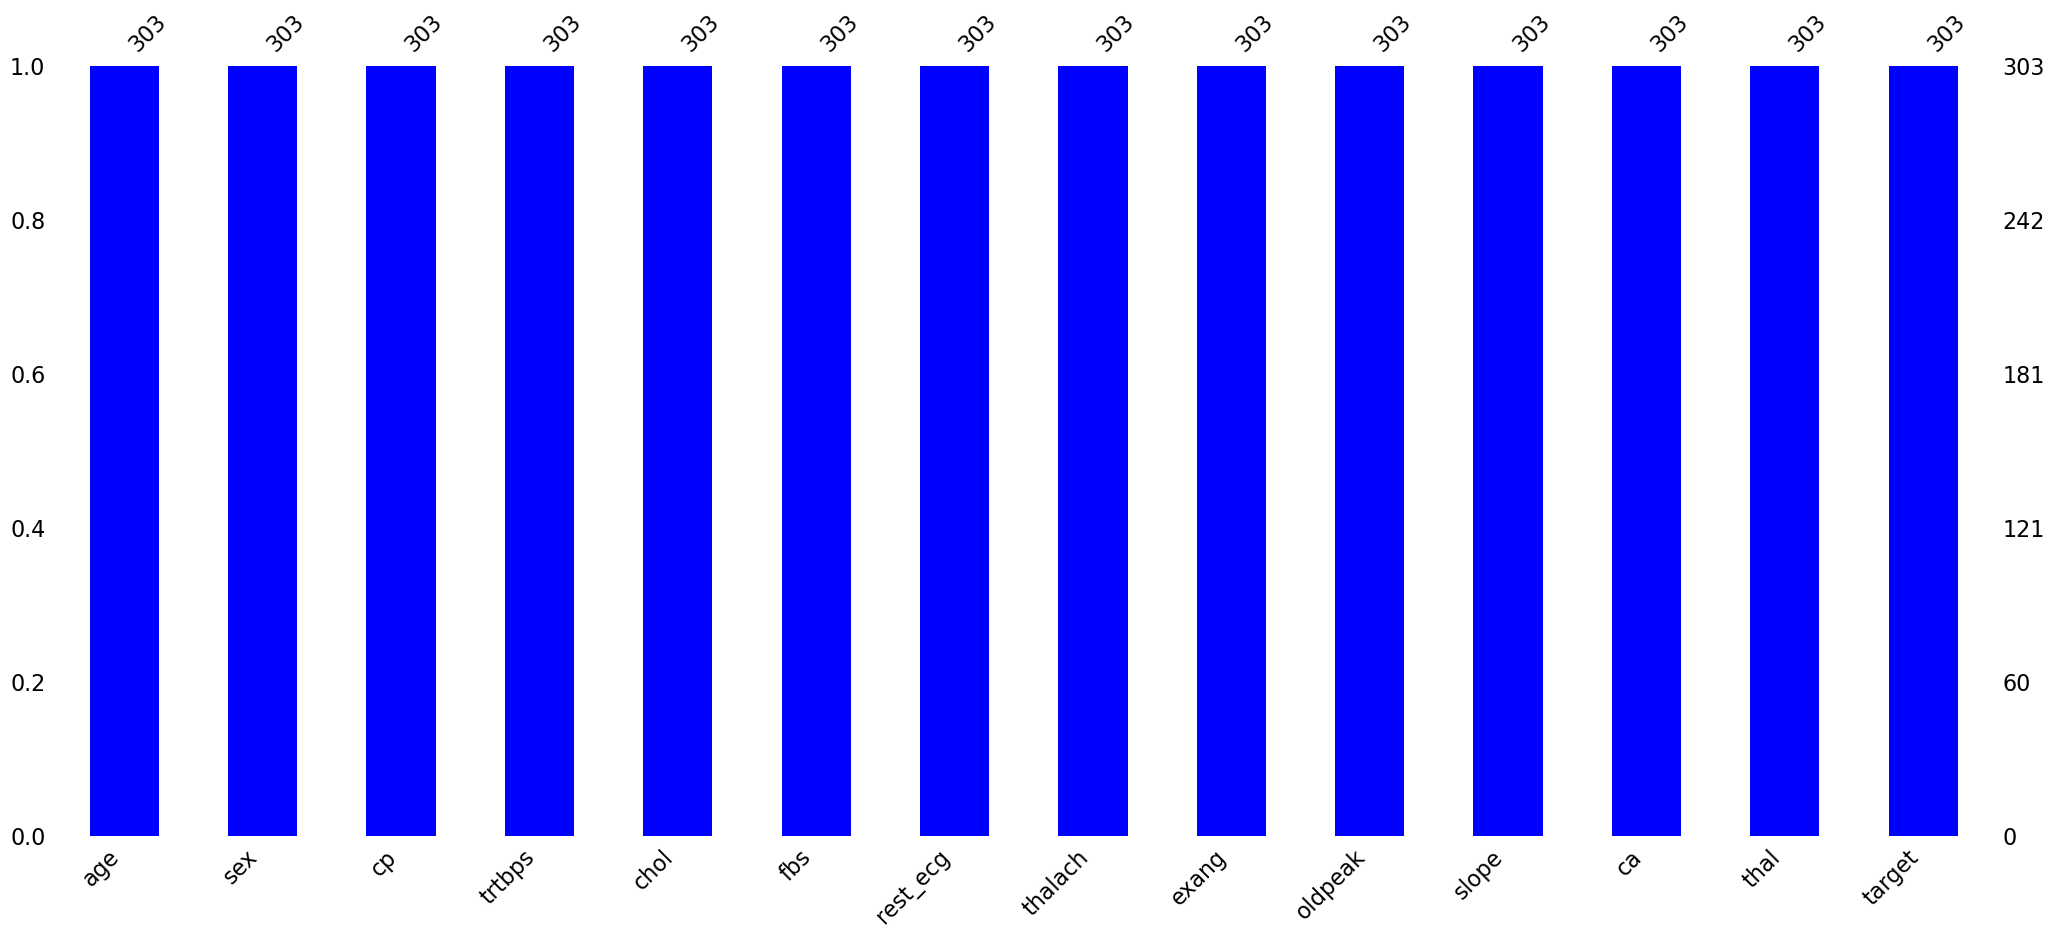

In [31]:
import missingno
missingno.bar(df, color = "b")
plt.show()

### Examining Unique Values

In [33]:
df.head()


age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [34]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [35]:
df["cp"].value_counts().sum()

303

In [40]:
df["cp"].value_counts().count()

4

In [42]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

Total Unique Values
age                        41
sex                         2
cp                          4
trtbps                     49
chol                      152
fbs                         2
rest_ecg                    3
thalach                    91
exang                       2
oldpeak                    40
slope                       3
ca                          5
thal                        4
target                      2

### Analysis Outputs

According to the result from the unique value dataframe :

We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.

In this context, Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In the next section, we will separate these 2 groups into 2 different lists.


### Separating variables (Numeric or Categorical)


In [46]:
df.head()

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  slope  \
0   63    1   3     145   233    1         0      150      0      2.3      0   
1   37    1   2     130   250    0         1      187      0      3.5      0   
2   41    0   1     130   204    0         0      172      0      1.4      2   
3   56    1   1     120   236    0         1      178      0      0.8      2   
4   57    0   0     120   354    0         1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [48]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Examining Statistics of Variables


In [51]:
df[numeric_var].describe()

age      trtbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

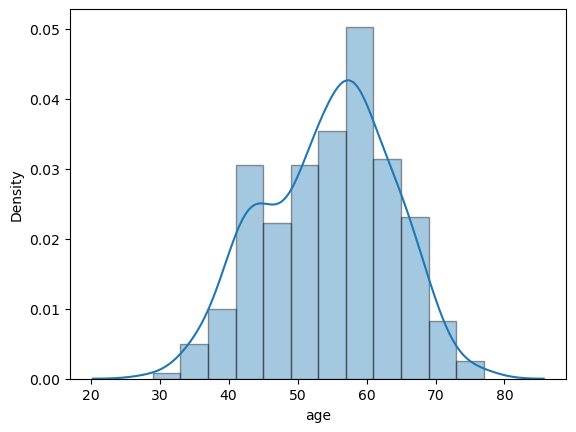

In [53]:
# "age" variable
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

### Analysis of "age" variable according to Describe() method

The minimum value of the ages is 29, and the maximum value is 77.

So, if we don't look at other data, only these two data should mean that the midpoint must be 53 from the mathematical operation ((29 + 77) / 2).

The mean of the data for the age is 54. Isn't the average of the minimum and maximum values that we found just by mathematical calculations 53?

They are almost equal to each other.

That means the age variable has a normal distribution. The normal distribution is the ideal statistical distribution for us.

Let's look at the quartiles.
The data average is in the middle of the 25% and 75% quarters. This means that the age variable is prone to the normal distribution.

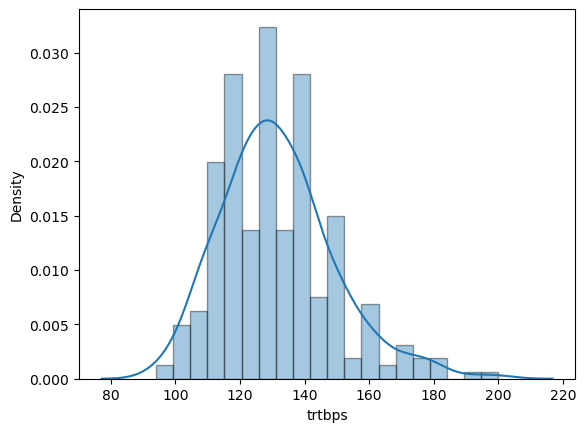

In [56]:

# "trtbps" variable
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

### Analysis of "trtbps" variable according to Describe() method

The minimum value for the "trtbps" variable is 94, and the maximum value is 200. The average of these two numbers is 147.

The major average is 131.

There is not much difference between 131 and 147. "trtbps" data tends to be normally distributed.

However, very little data remains on the left side of 147. This means that when we take the midpoint of the minimum value and the maximum value as a basis, the data on the left is more than on the right.

So, there will be a small queue towards the right side due to the lack of data on the right side.

In summary, we can say that this data is prone to a normal distribution, but there is a slight right skew.

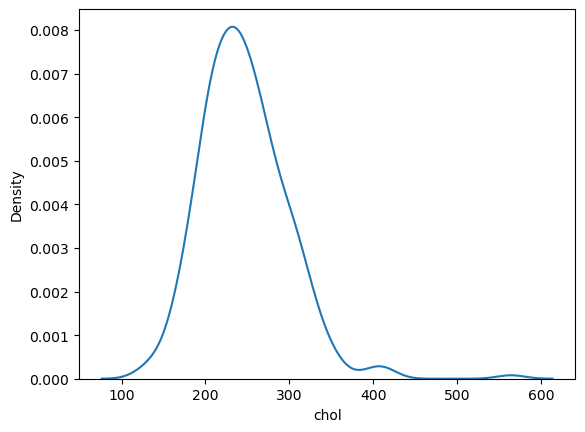

In [58]:
# "chol" variable
sns.distplot(df["chol"], hist = False);

### Analysis of "chol" variable according to Describe() method¶

The minimum value for the "chol" variable is 126, and the maximum is 564. The middle of these two values is 345.
The major average is 246.
                                                
When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value.
                                                
Let's check the quartiles. There are values up to 274 in the first 75 percent. Considering that the maximum value is 564, we see that most of the data is on the left.

So data is slightly skewed to the right due to values that outlier

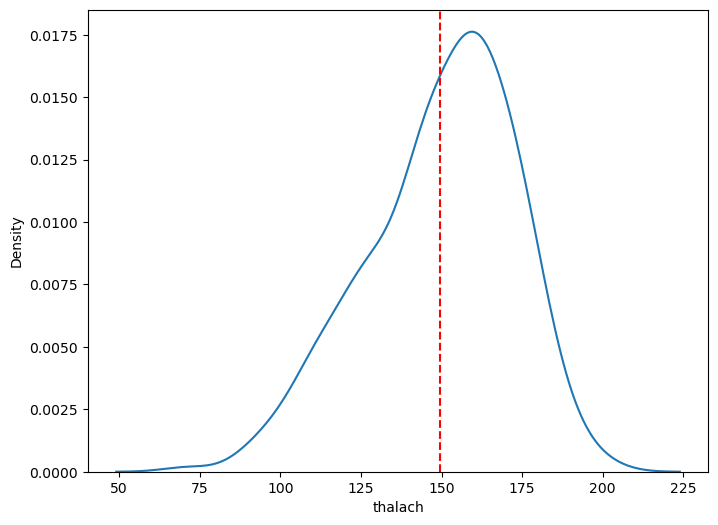

In [61]:
# "thalachh" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--");

### Analysis of "thalach" variable according to Describe() method¶

The minimum value of the "thalach" variable is 71. The maximum value is 202. According to these two values, the midpoint value is 137.

The central average is 149.6

So there is a left skew, although not much.

When we examine the quartiles, The 25%, 50%, and 75% sections between the minimum and maximum values are homogeneously distributed.

As a result, the data tends to be normally distributed, but there is a slight left skew.

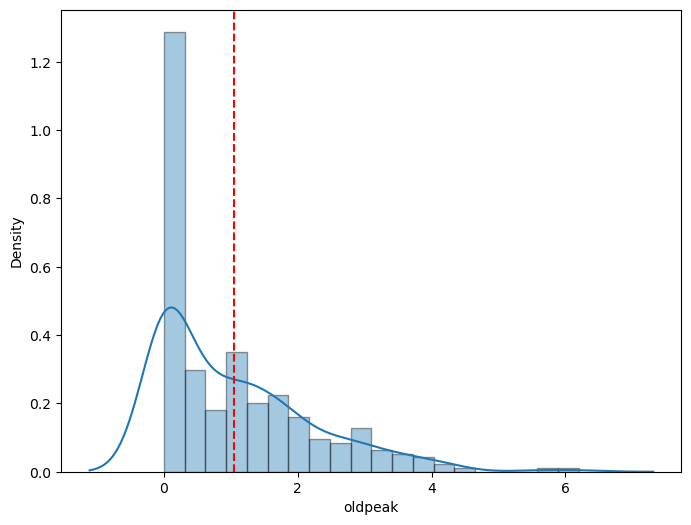

In [64]:
# "oldpeak" variable
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");


### Analysis of "oldpeak" variable according to Describe() method¶

The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10

When we look at the mean, we see that it is 1.03

When we examine the quartiles, 75% of the data consists of values up to 1.60

This shows that; There is an incredible right skew in the data.

## Exploratory Data Analysis(EDA)


In [68]:
numeric_var


['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [69]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]


In [71]:
list(zip(numeric_var, numeric_axis_name))


[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

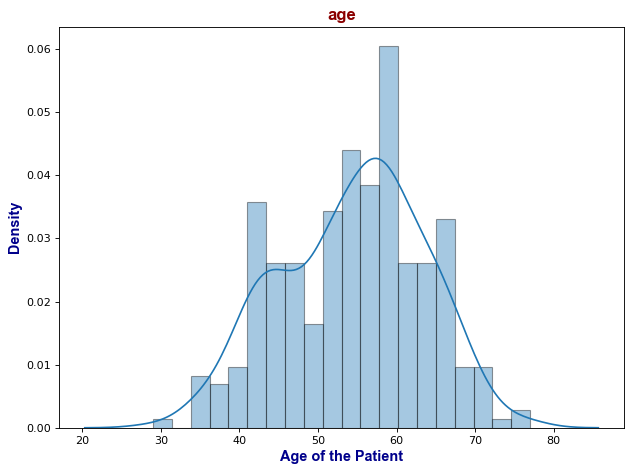

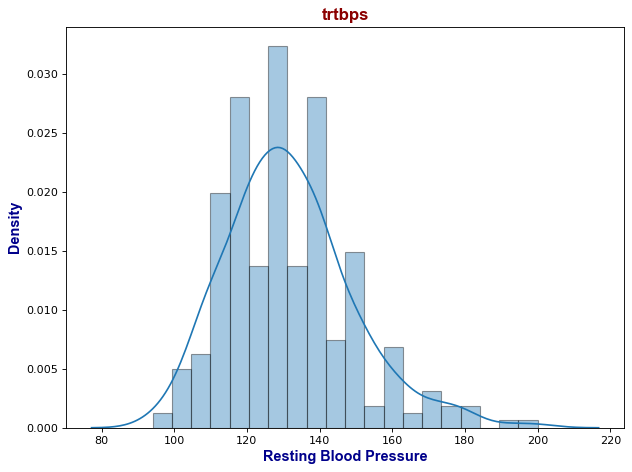

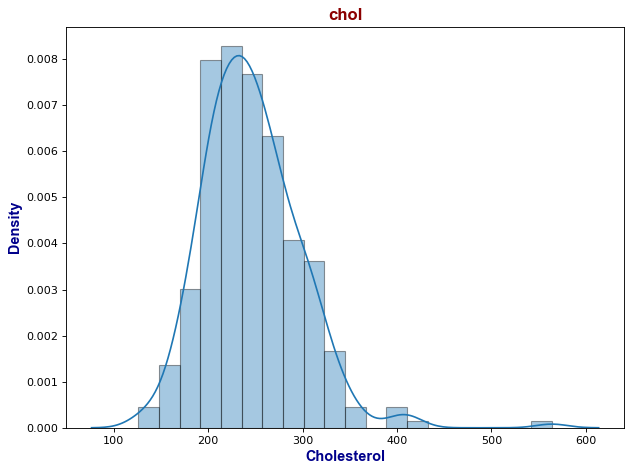

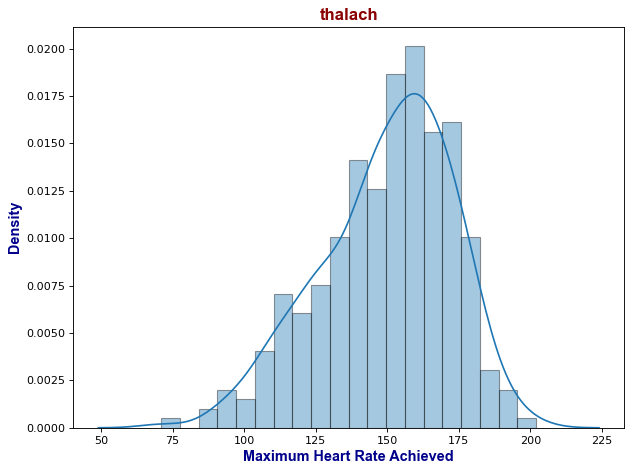

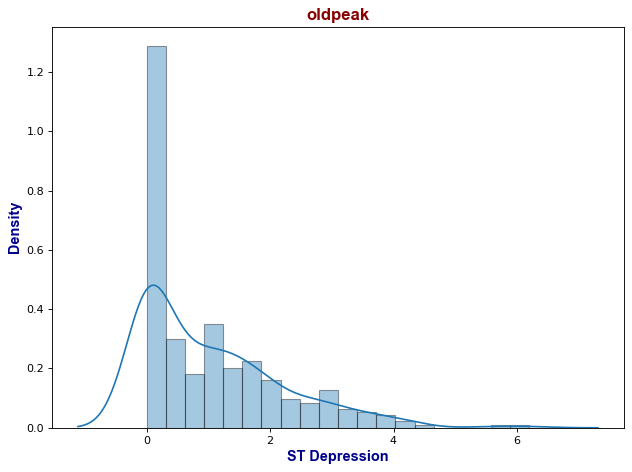

In [72]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

## Analysis Outputs

Age Variable
-------------

The vast majority of patients are between 50 and 60.

There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.

It looks like there are no outliers in the variable.

Trtbps Variable
---------------

The resting blood pressure of most patients is generally between 110 and 140.

Values after 180 can be considered as outliers.

There is hefty patient traffic between 115-120, 125-130, and 155-160 values.

Cholesterol Variable
--------------------
Cholesterol value in most patients is between 200-and 280.

Values after 380 can be considered as outliers.

Thalachh Variable¶
-----------------
The maximum heart rate achieved in most patients is between 145-and 170.

In particular, The values before 80 can be considered outliers.

Oldpeak Variable
----------------

Values of the vast majority of patients in the variable range from 0 to 1.5.

Especially values after 2.5 can be considered as outliers.


In [77]:
categoric_var


['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [78]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [79]:
list(zip(categoric_var, categoric_axis_name))


[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [80]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [81]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [82]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

In [83]:
print([col for col in df.columns])

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


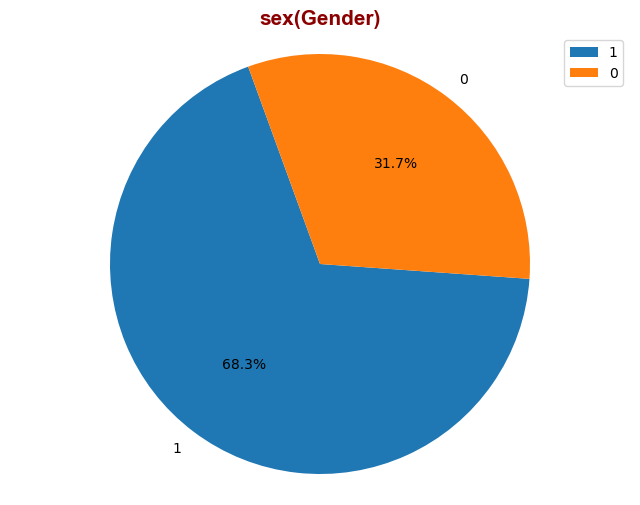

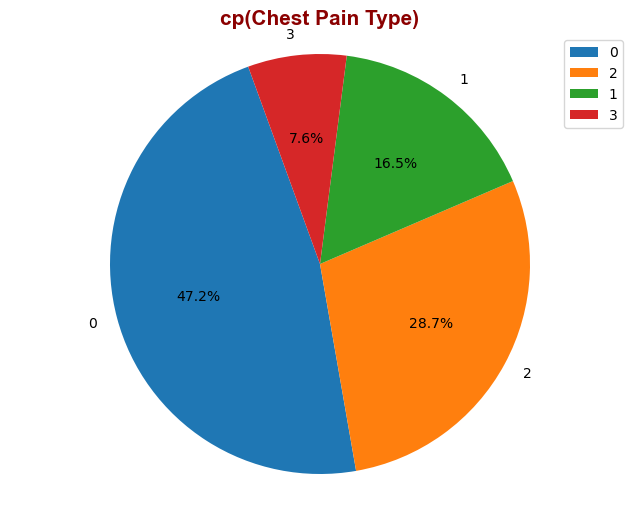

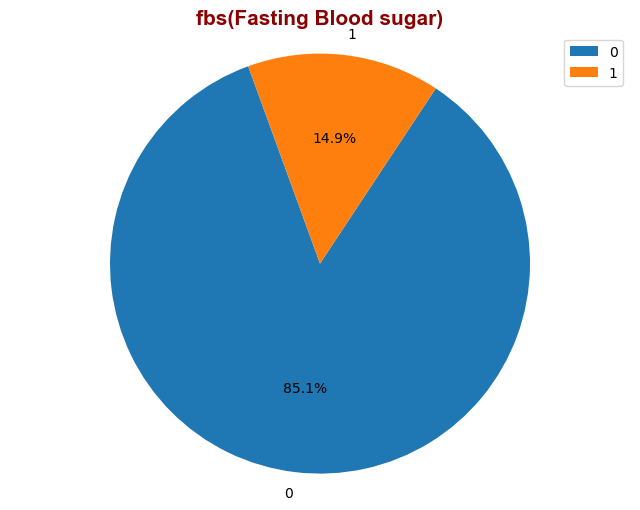

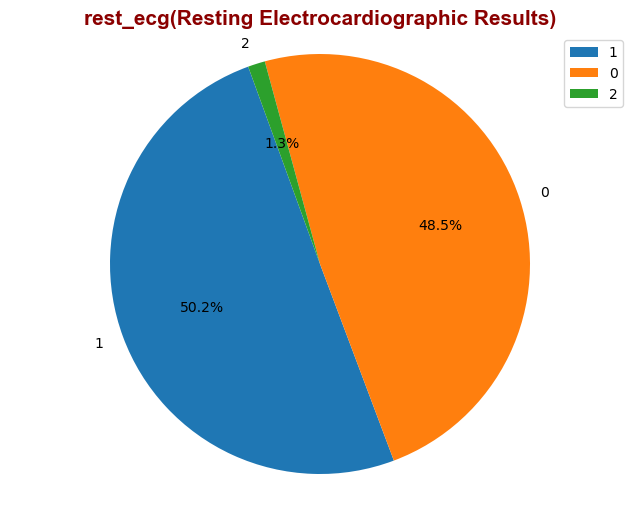

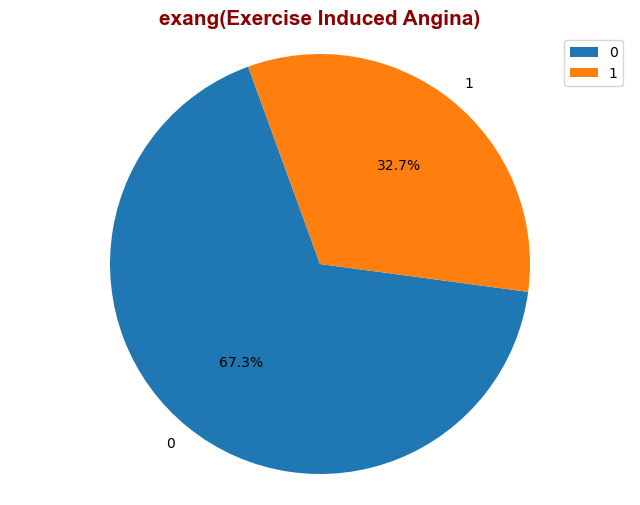

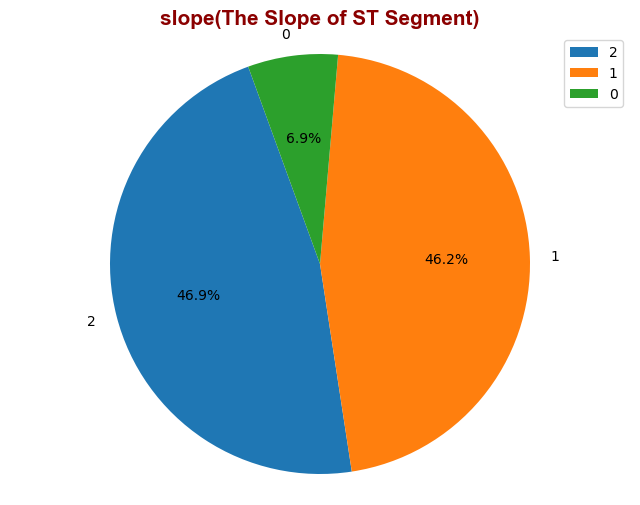

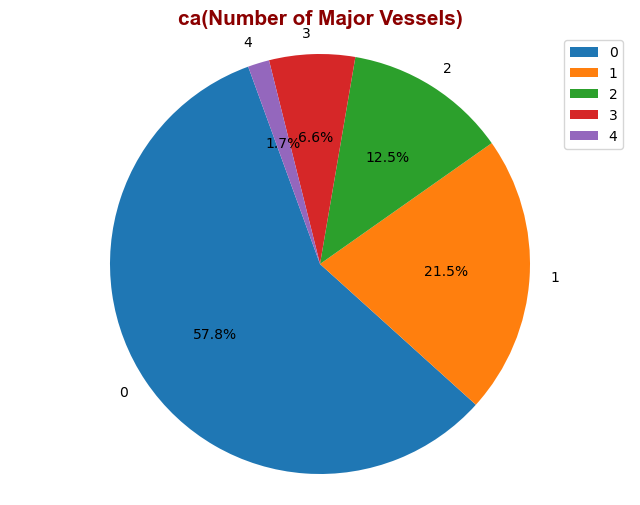

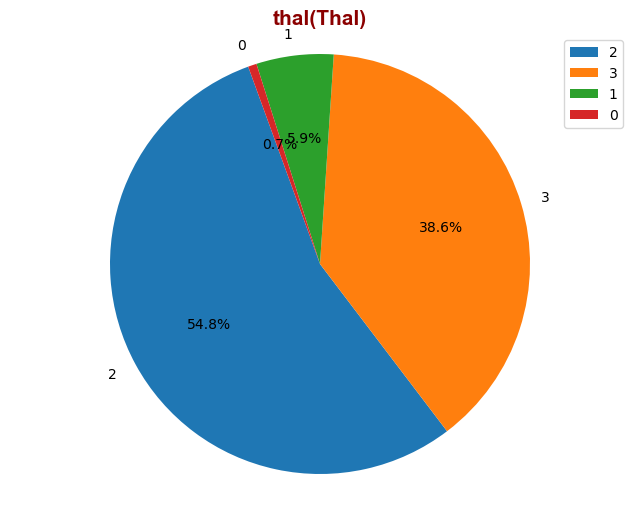

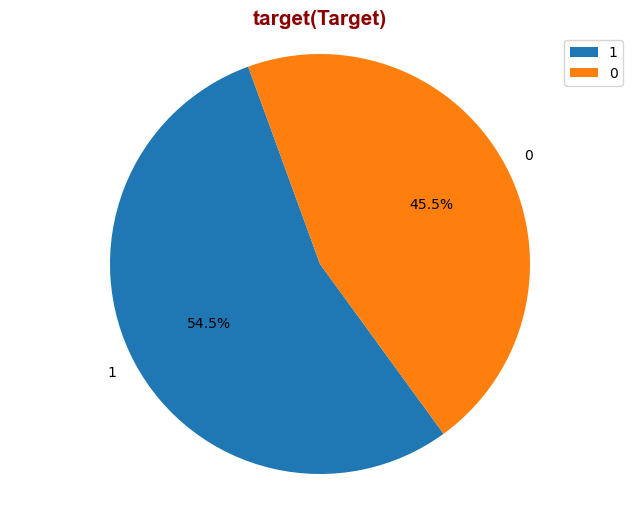

In [84]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

### Analysis Outputs

Sex Variable
------------
68.3% of the patients are male, 31.7% are female.

So, the number of male patients is more than twice that of female patients.

Cp Variable
-----------

Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
Half of the patients are asymptomatic; they have pain without symptoms.

If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.

In other words, atypical angina is in 29% of the patients.

This observation value shows patients with shortness of breath or non-classical pain.

The other two observation values are less than the others.

16.5% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.

The other 8% has the value of non-anginal pain, which is three types of angina.

Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.

Fbs Variable¶
-------------

The vast majority of patients have an observation value of 1. In other words, 85%.

The fasting blood sugar of these patients is more than 120 mg/dl.

The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.

Rest_ecg Variable
-----------------

The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.

It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.

This value represents the ST and T wavelengths of the patients.

Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.

The size of those with 1, that is, the orange part on the graph is 50.2%

This means that the resting electrocardiographic results of these patients are normal.

The percentage of patients with a value of 0 is 48.5%.

That is, the patients' values of 48.5% are normal.

Exang Variable¶
---------------
We have said that this variable stands for exercise-induced angina.

Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.

According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.

In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.

Slope Variable
-------------
The minimum observation value is 0 with 7 percent.

This is patients with a downward slope of the ST wavelength.

The other two observation values are almost equal to each other.

The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

Ca variable
-----------
This variable is the number of great vessels colored by fluoroscopy.

In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.

After 0 observation value, the other value with the most slices in the pie chart 1

The number of large vessels observed in 21.5% of the patients is 1

The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.

Thal Variable¶
-------------
The "Thal" variable is short for the "Thallium stress test."

The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.

There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.

According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.

In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.

36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.

5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.

Target Variable
---------------
More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.



In [87]:
df[df["thal"] == 0]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     0       1  
281      1   0     0       0

In [88]:
df["thal"] = df["thal"].replace(0, np.nan)

In [89]:
df.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   NaN       1  
281      1   0   NaN       0

In [92]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         2
target                       0

In [98]:
df["thal"].fillna(2, inplace = True)

In [99]:
df.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0   2.0       1  
281      1   0   2.0       0

In [100]:
df

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
0     63    1   3     145   233    1         0      150      0      2.3   
1     37    1   2     130   250    0         1      187      0      3.5   
2     41    0   1     130   204    0         0      172      0      1.4   
3     56    1   1     120   236    0         1      178      0      0.8   
4     57    0   0     120   354    0         1      163      1      0.6   
..   ...  ...  ..     ...   ...  ...       ...      ...    ...      ...   
298   57    0   0     140   241    0         1      123      1      0.2   
299   45    1   3     110   264    0         1      132      0      1.2   
300   68    1   0     144   193    1         1      141      0      3.4   
301   57    1   0     130   131    0         1      115      1      1.2   
302   57    0   1     130   236    0         0      174      0      0.0   

     slope  ca  thal  target  
0        0   0   1.0       1  
1        0   0   2.0       1  
2        2   0   2.0       1  
3        2   0   2.0       1  
4        2   0   2.0       1  
..     ...  ..   ...     ...  
298      1   0   3.0       0  
299      1   0   3.0       0  
300      1   2   3.0       0  
301      1   1   3.0       0  
302      1   1   2.0       0  

[303 rows x 14 columns]

In [101]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [106]:
df.loc[[48, 281], :]

age  sex  cp  trtbps  chol  fbs  rest_ecg  thalach  exang  oldpeak  \
48    53    0   2     128   216    0         0      115      0      0.0   
281   52    1   0     128   204    1         1      156      1      1.0   

     slope  ca  thal  target  
48       2   0     2       1  
281      1   0     2       0

In [108]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

Total Missing Values
age                          0
sex                          0
cp                           0
trtbps                       0
chol                         0
fbs                          0
rest_ecg                     0
thalach                      0
exang                        0
oldpeak                      0
slope                        0
ca                           0
thal                         0
target                       0

In [113]:
df["thal"].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

In [116]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [118]:
numeric_var.append("target")

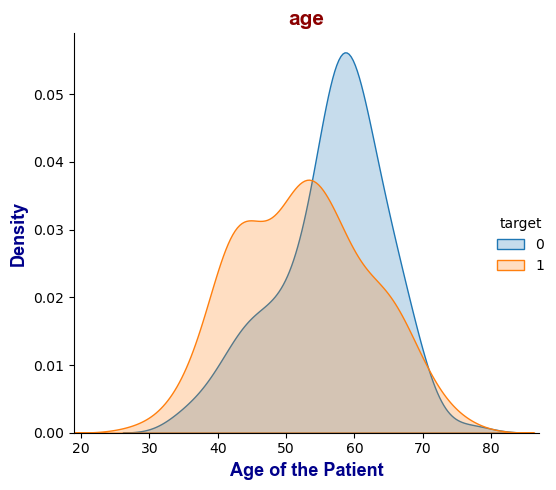

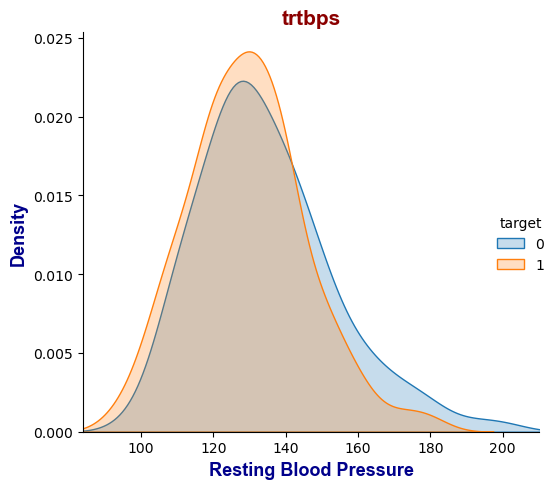

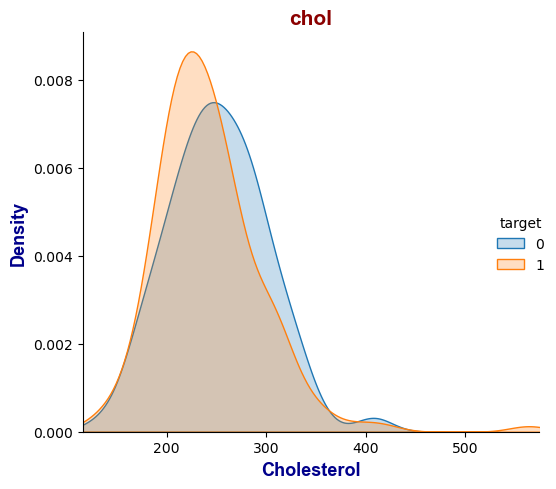

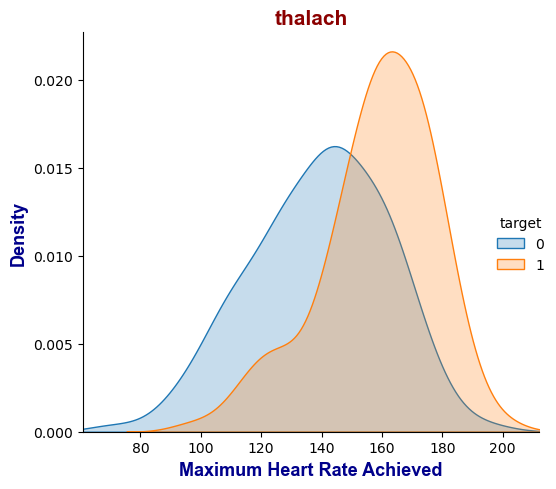

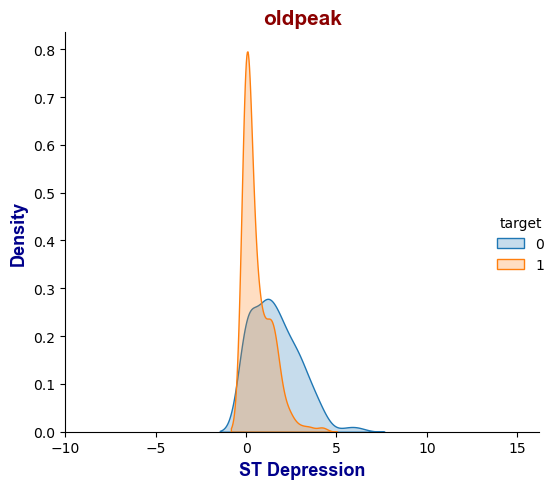

In [121]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = "target", height = 5, xlim = ((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade = True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [122]:
df[numeric_var].corr()


age    trtbps      chol   thalach   oldpeak    target
age      1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trtbps   0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol     0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak  0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target  -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000

In [123]:
df[numeric_var].corr().iloc[:, [-1]]

target
age     -0.225439
trtbps  -0.144931
chol    -0.085239
thalach  0.421741
oldpeak -0.430696
target   1.000000

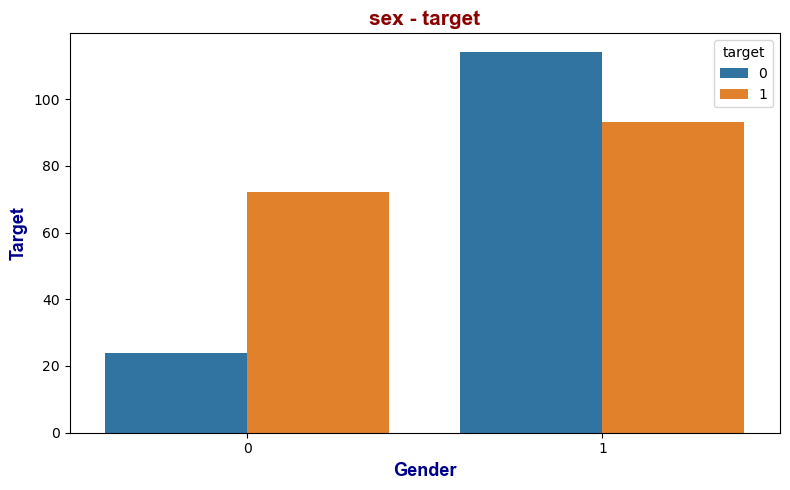

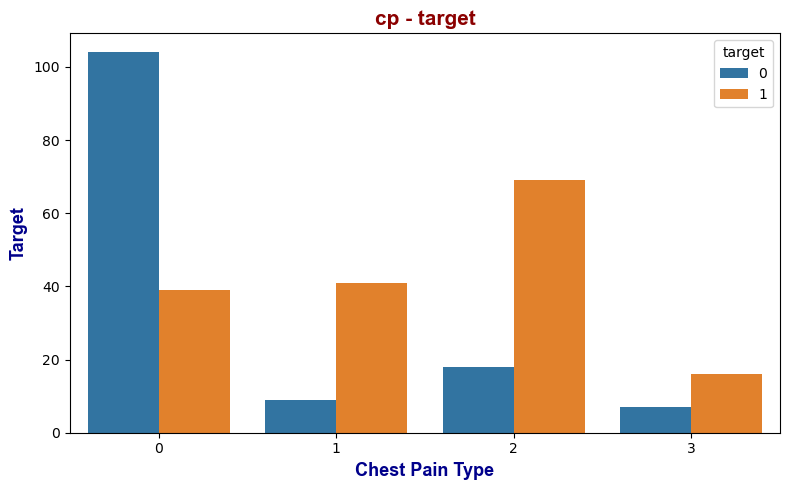

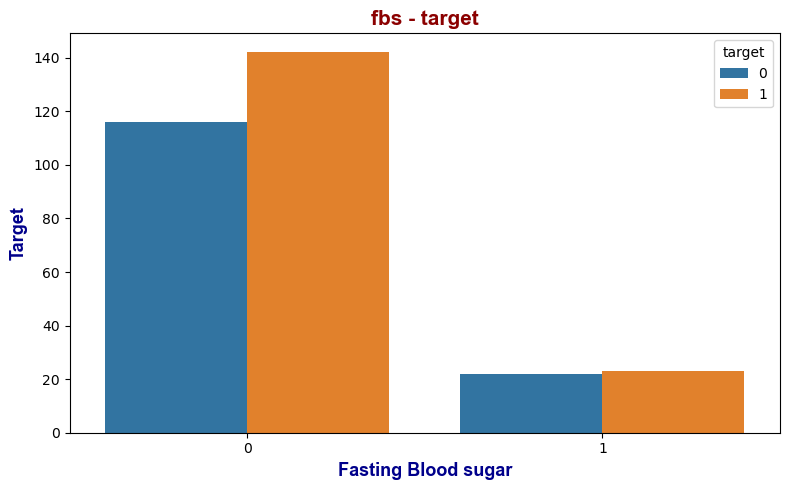

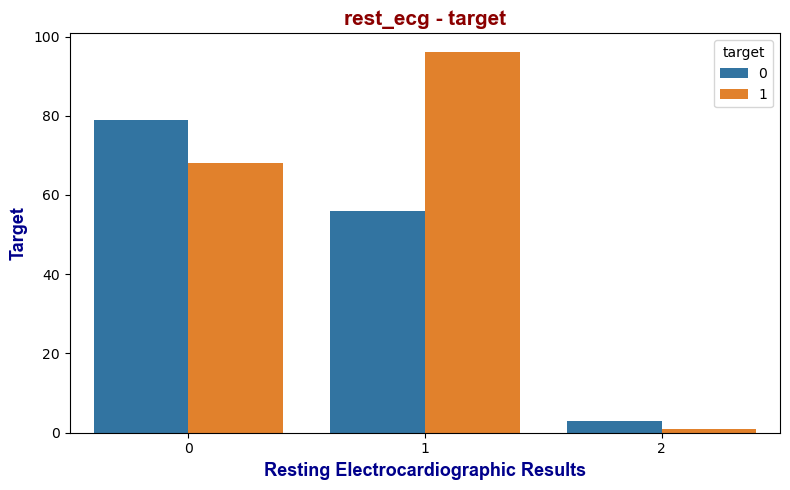

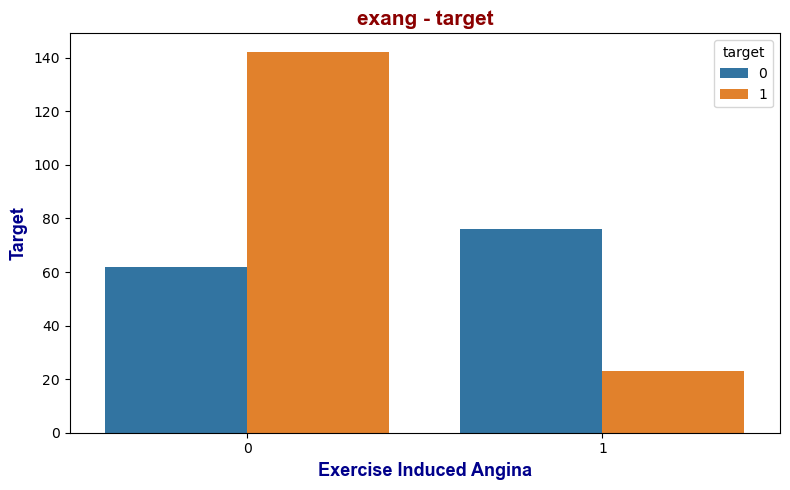

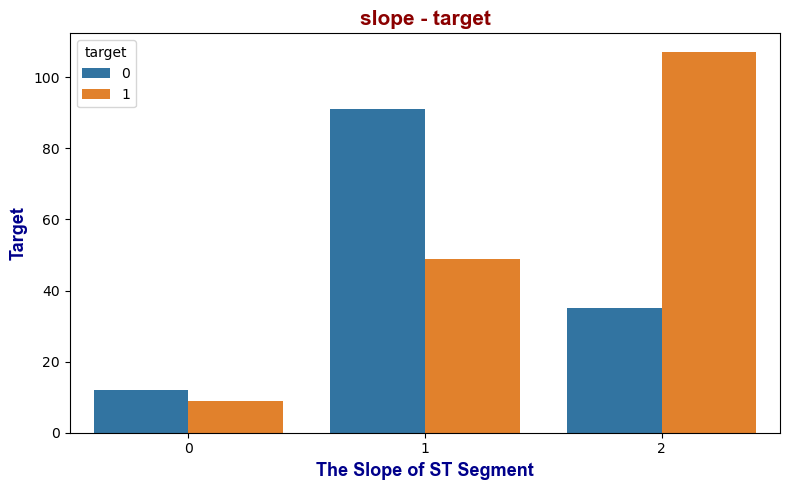

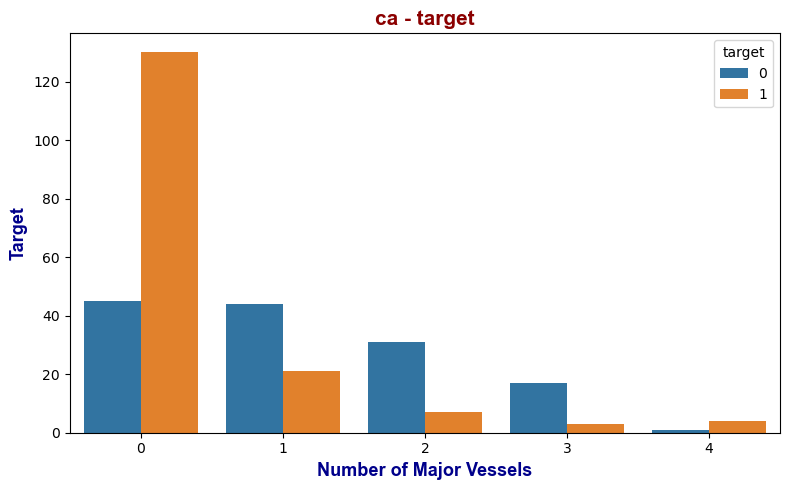

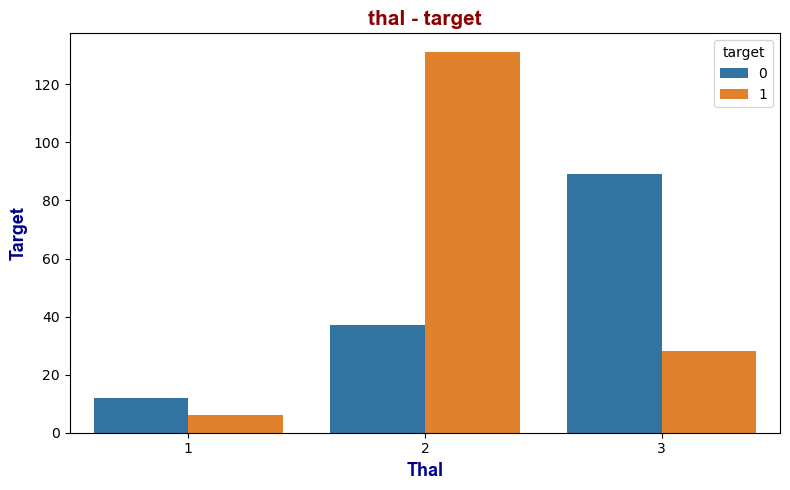

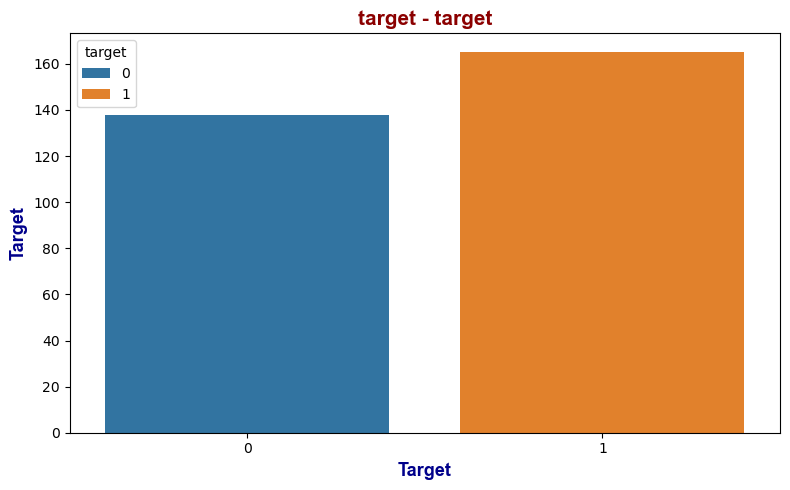

In [125]:
title_font = {"family": "arial", "color": "darkred", "weight": "bold", "size": 15}
axis_font = {"family": "arial", "color": "darkblue", "weight": "bold", "size": 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize=(8, 5))
    
    sns.countplot(x=i, data=df, hue="target")
    
    plt.title(i + " - target", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

In [127]:
df[categoric_var].corr()


sex        cp       fbs  rest_ecg     exang     slope  \
sex       1.000000 -0.049353  0.045032 -0.058196  0.141664 -0.030711   
cp       -0.049353  1.000000  0.094444  0.044421 -0.394280  0.119717   
fbs       0.045032  0.094444  1.000000 -0.084189  0.025665 -0.059894   
rest_ecg -0.058196  0.044421 -0.084189  1.000000 -0.070733  0.093045   
exang     0.141664 -0.394280  0.025665 -0.070733  1.000000 -0.257748   
slope    -0.030711  0.119717 -0.059894  0.093045 -0.257748  1.000000   
ca        0.118261 -0.181053  0.137979 -0.072042  0.115739 -0.080155   
thal      0.211652 -0.169125 -0.011209 -0.013795  0.225508 -0.106310   
target   -0.280937  0.433798 -0.028046  0.137230 -0.436757  0.345877   

                ca      thal    target  
sex       0.118261  0.211652 -0.280937  
cp       -0.181053 -0.169125  0.433798  
fbs       0.137979 -0.011209 -0.028046  
rest_ecg -0.072042 -0.013795  0.137230  
exang     0.115739  0.225508 -0.436757  
slope    -0.080155 -0.106310  0.345877  
ca        1.000000  0.143248 -0.391724  
thal      0.143248  1.000000 -0.363322  
target   -0.391724 -0.363322  1.000000

In [129]:
df[categoric_var].corr().iloc[:, [-1]]

target
sex      -0.280937
cp        0.433798
fbs      -0.028046
rest_ecg  0.137230
exang    -0.436757
slope     0.345877
ca       -0.391724
thal     -0.363322
target    1.000000

In [131]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [133]:
numeric_var.remove("target")

In [135]:
df[numeric_var].head()


age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4
3   56     120   236      178      0.8
4   57     120   354      163      0.6

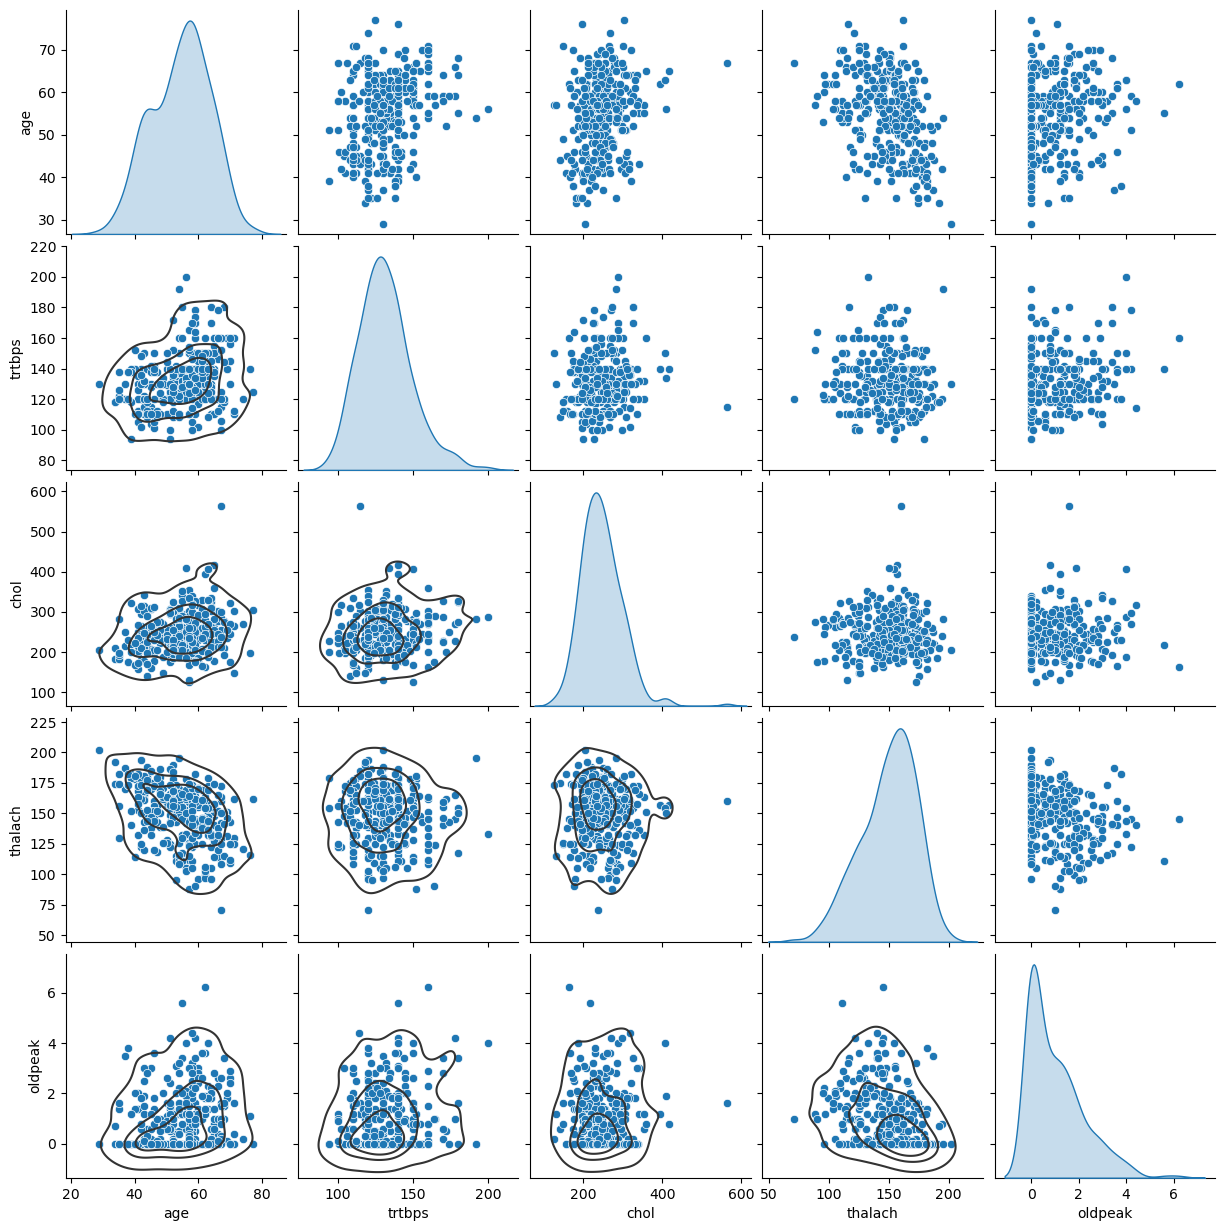

In [137]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
plt.show()

### Analysis Outputs

Age Variable
------------
The age variable with the most relationship is the "thalach" variable.

There is a collection of points extending in the southwest direction.

There is a negative correlation since the points are pointing downwards.

However, since the points are somewhat scattered, this correlation is moderate.

Trtbps Variable
---------------

The relationship between "Trtbps" and other variables is weak.

There is clutter in the graphics in general.

With the age variable, the dots appear a little more often. There is a positive correlation.

The lowest correlation is with the "thalach" variable. The dots are incredibly messy. There is no smooth distribution.

Chol Variable
-------------

The variables that have the highest correlation with the variable "chol" are "age" and "trtbps".

However, the relationship between the "age" variable is slightly higher.

So cholesterol increases with age.

There is almost no relationship with other variables.

Thalach Variable
----------------

The age variable has the most relationship with the Thalach variable. There seems to be a moderately negative relationship.

There is not much correlation between the variable "trtbps" and "chol". The dots are too scattered.

When we look at the relationship with the "old peak" variable, we can say a close relationship with the middle level.

Oldpeak Variable
----------------

We cannot find an explicit expression when interpreting the graphics of this variable because the relationship with all variables is similar to each other.

However, we can say this in general: There is a close relationship with moderate with all variables.

In [141]:
from sklearn.preprocessing import RobustScaler

In [144]:
robust_scaler = RobustScaler()

In [146]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [148]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [152]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

age  trtbps      chol   thalach  oldpeak
0  0.592593    0.75 -0.110236 -0.092308   0.9375
1 -1.333333    0.00  0.157480  1.046154   1.6875
2 -1.037037    0.00 -0.566929  0.584615   0.3750
3  0.074074   -0.50 -0.062992  0.769231   0.0000
4  0.148148   -0.50  1.795276  0.307692  -0.1250

In [154]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)

In [156]:
df_new.head()

age  trtbps      chol   thalach  oldpeak  target
0  0.592593    0.75 -0.110236 -0.092308   0.9375       1
1 -1.333333    0.00  0.157480  1.046154   1.6875       1
2 -1.037037    0.00 -0.566929  0.584615   0.3750       1
3  0.074074   -0.50 -0.062992  0.769231   0.0000       1
4  0.148148   -0.50  1.795276  0.307692  -0.1250       1

In [158]:
melted_data = pd.melt(df_new, id_vars = "target", var_name = "variables", value_name = "value")
melted_data

target variables     value
0          1       age  0.592593
1          1       age -1.333333
2          1       age -1.037037
3          1       age  0.074074
4          1       age  0.148148
...      ...       ...       ...
1510       0   oldpeak -0.375000
1511       0   oldpeak  0.250000
1512       0   oldpeak  1.625000
1513       0   oldpeak  0.250000
1514       0   oldpeak -0.500000

[1515 rows x 3 columns]

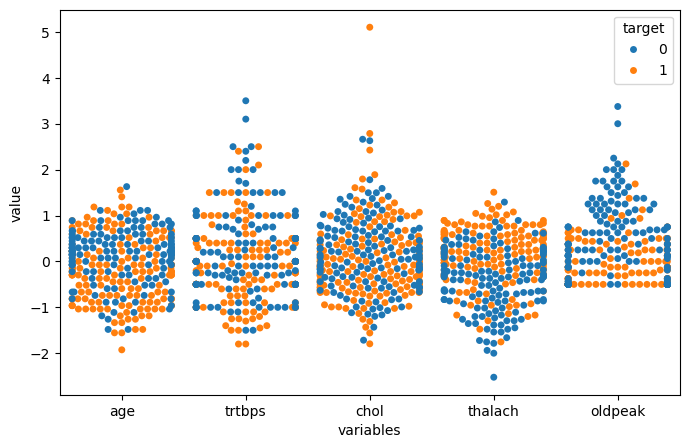

In [160]:
plt.figure(figsize = (8, 5))
sns.swarmplot(x = "variables", y = "value", hue = "target", data = melted_data)
plt.show()

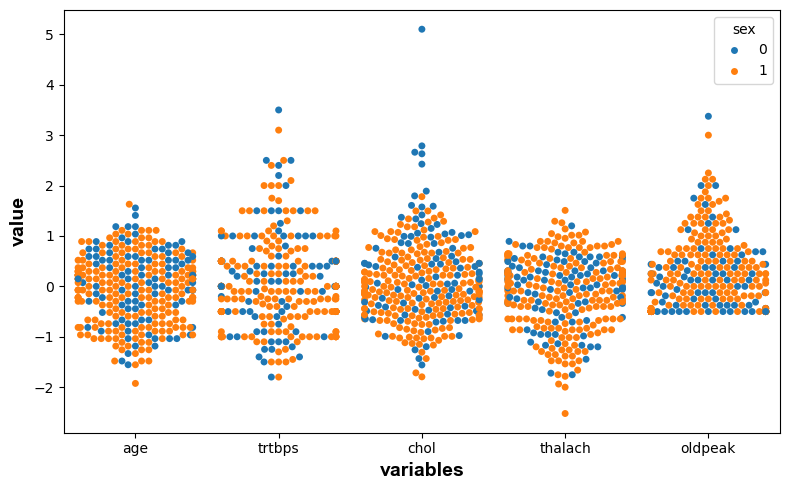

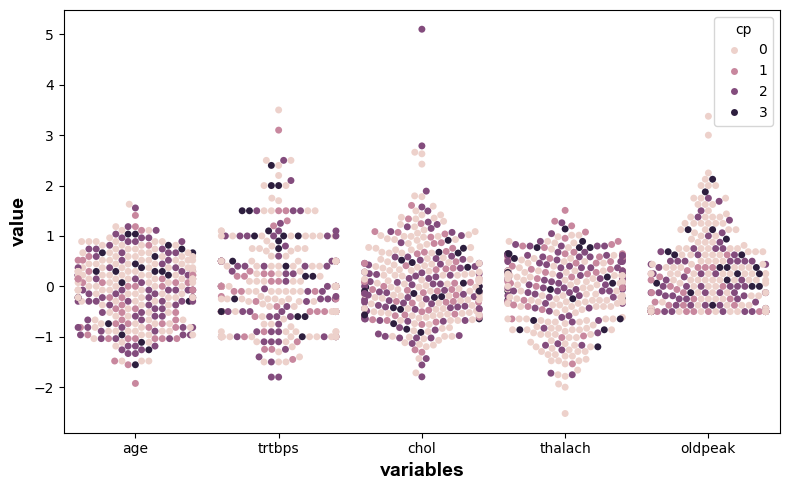

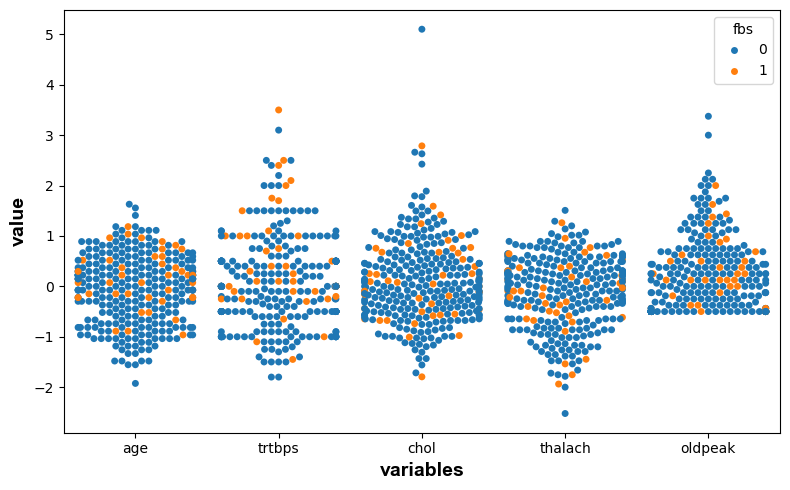

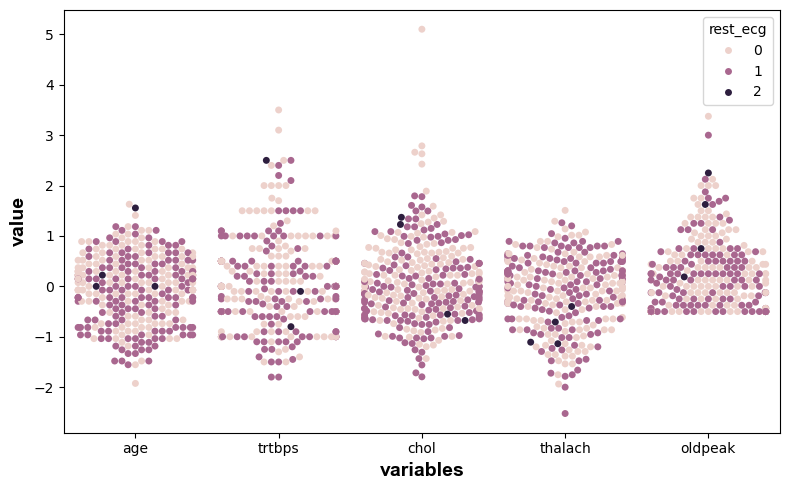

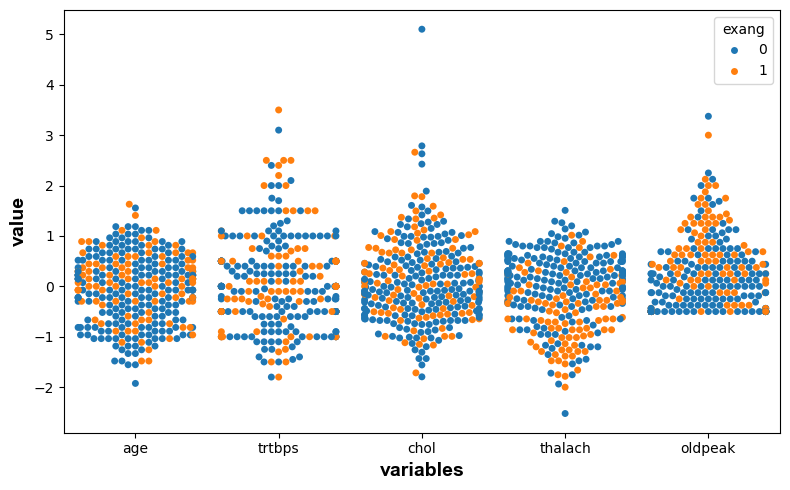

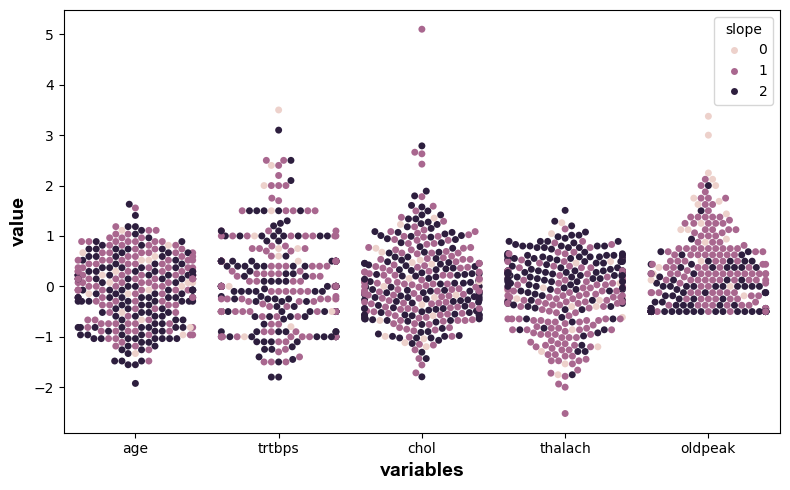

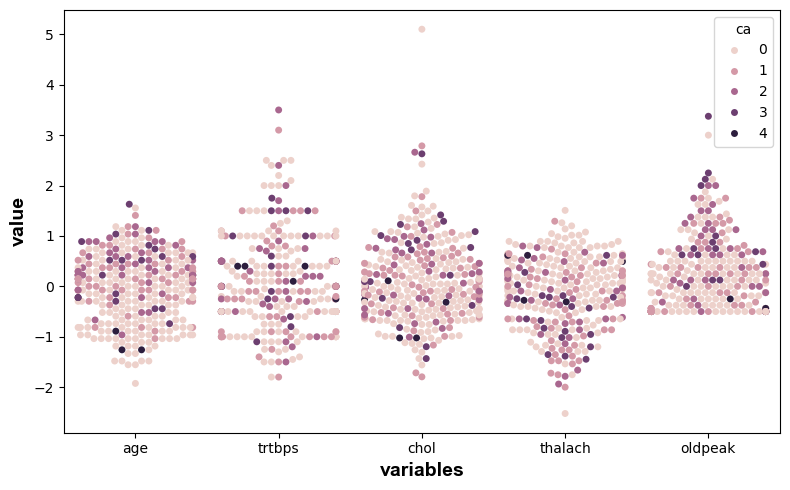

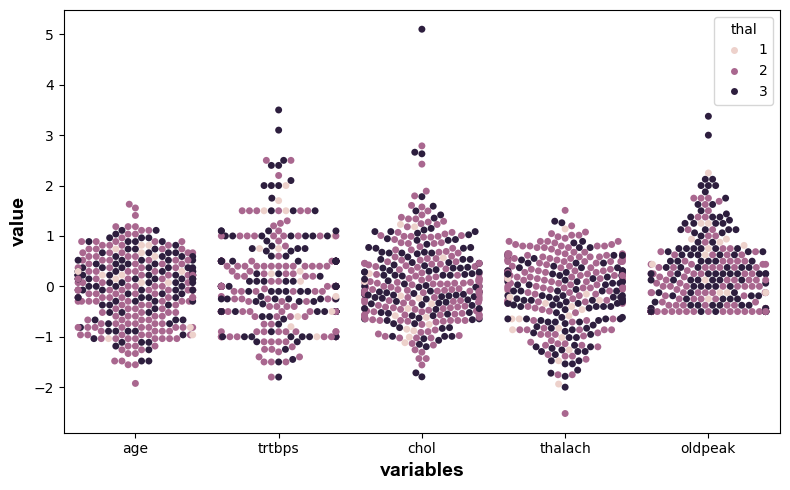

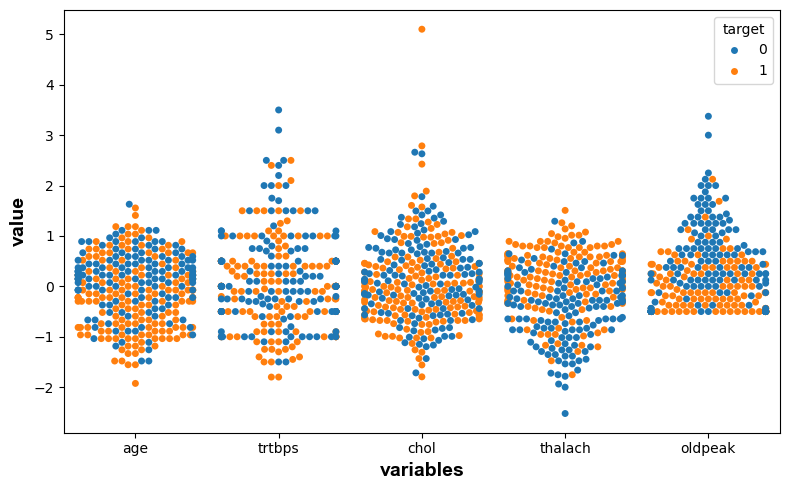

In [162]:

axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.swarmplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

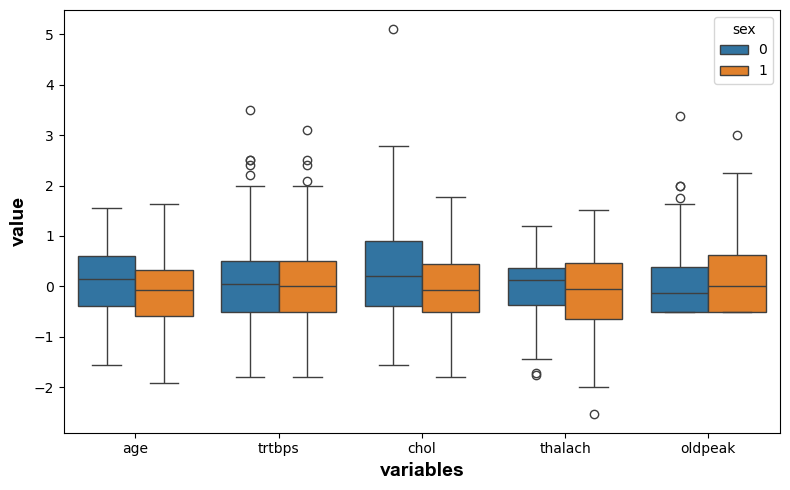

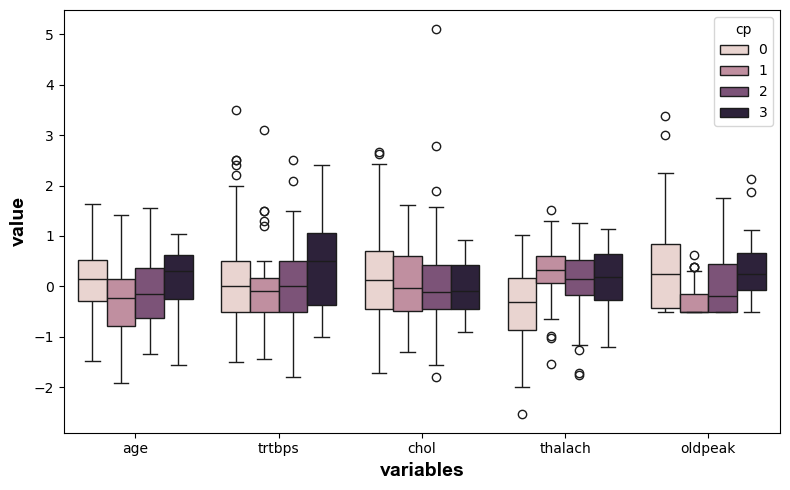

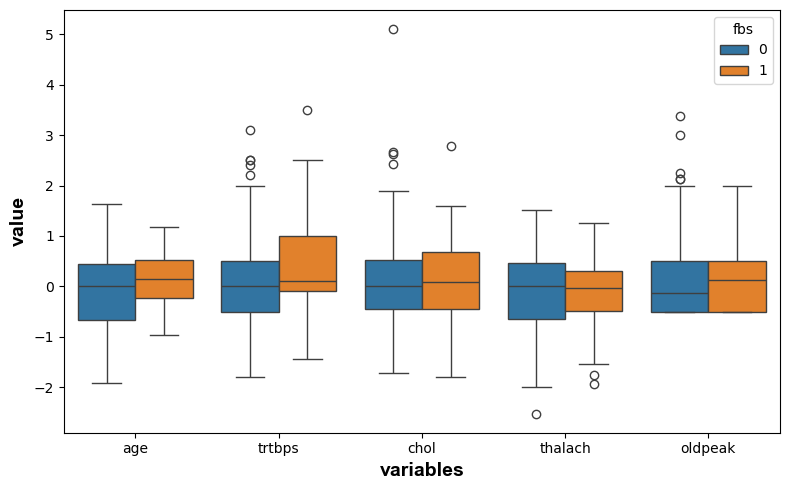

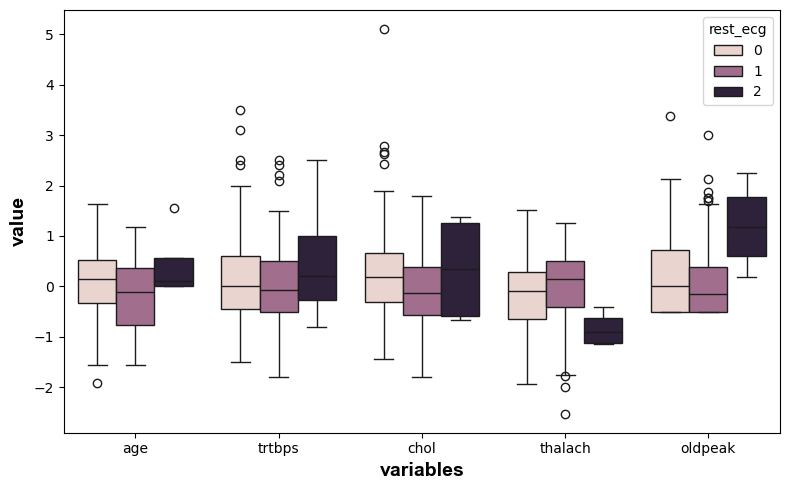

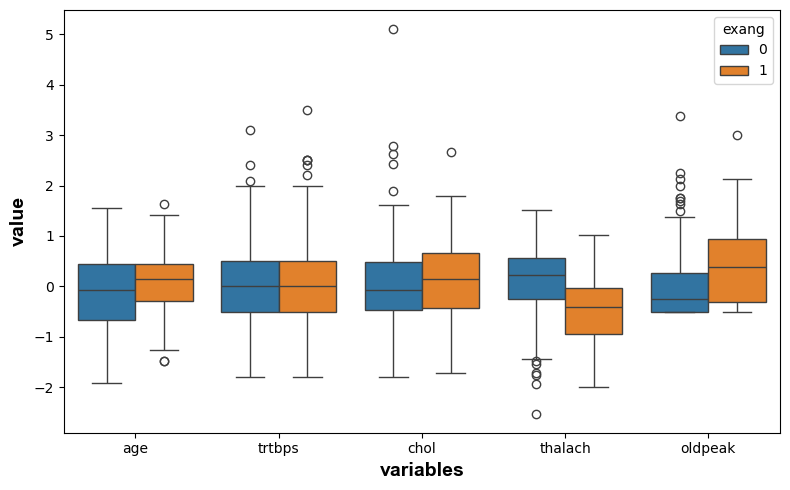

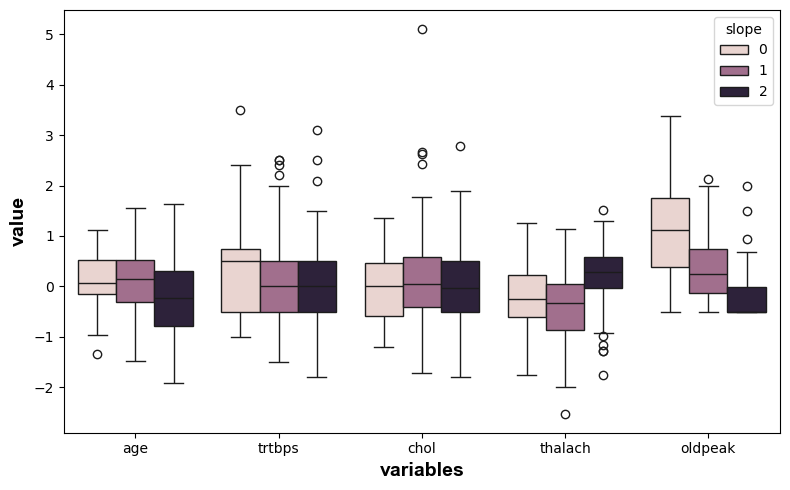

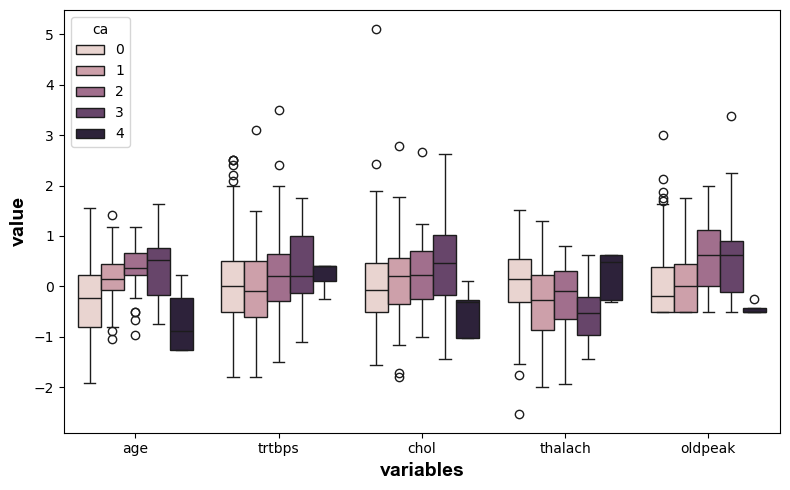

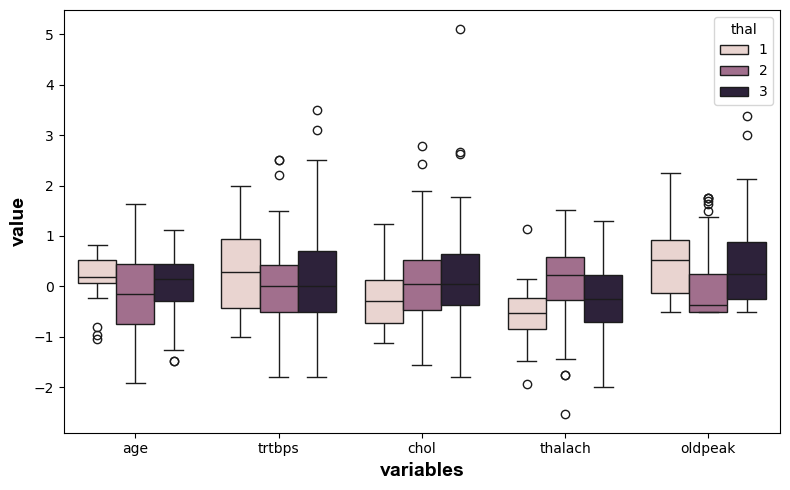

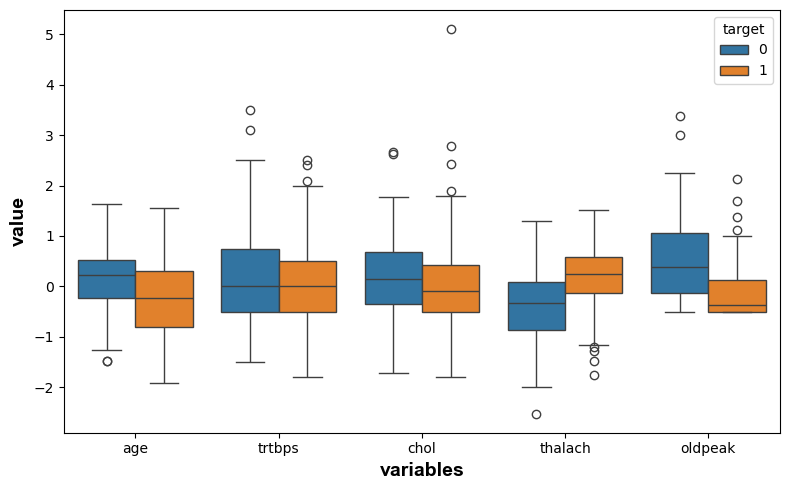

In [164]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables", value_name = "value")
    
    plt.figure(figsize = (8, 5))
    sns.boxplot(x = "variables", y = "value", hue = i, data = melted_data)
    
    plt.xlabel("variables", fontdict = axis_font)
    plt.ylabel("value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

### 4.2.7.1 Analysis Outputs(10)

Sex - Numeric Variables
-----------------------

There is no very high correlation between "sex" and numerical variables. There is a weak relationship with all of them.
When the boxes of the observation values ​​of the gender variable are examined, it is seen that it is difficult to distinguish from each other.

Cp - Numeric Variables
----------------------

There is a relationship between the "cp" and the "thalach" variables. The median of the blue box displays a shape outside of all the other boxes. In general, although there is not much difference between the Boxes, we can say that they have a higher relationship than the others.
So, "cp", that is, chest pain, has a higher correlation with the maximum heart rate achieved.
The relationship with other variables is weak.

Fbs - Numeric Variables
-----------------------

In general, it isn't easy to do between boxes. The median values ​​intersect with each other's boxes.
Therefore, we can directly say a weak relationship between the "fbs" variable and the numerical variables.

Rest_ecg - Numeric Variables
----------------------------

There is a point to be noted here. When we look directly at the box plot graph, the "slope" variable seems to have a high correlation with the "thalach" and "old peak" variables. The green boxes stand apart from the others and are noticeable because of their separation.
The green box represents patients with Hypertrophy. However, the number of these patients is deficient compared to others. In other words, we can say that it is a number that will not affect the main result when we consider the general.
In this context, we should evaluate without considering the green boxes while making our evaluation here.
When we interpret it that way, we see no strong relationship between the slope variable and other variables.
Because the median values of the patients whose observation values are 0 and 1, that is, of the blue and orange boxes, cut each other's boxes. It is challenging to make a distinction.
In summary, we can say that the relationship between the "rest ecg" variable and the numerical variables is weak.

Exang - Numeric Variables¶
--------------------------

There is a correlation between the "Exang" and "Thalach" variables. A clear distinction can be made between the boxes.
They have a similar relationship with the "old peak" variable.
There does not appear to be a relationship with the other three numerical variables.

Slope - Numeric Variables
-------------------------

There is a relationship between "slope" and "old peak". The difference between the boxes of the observation values is evident.
We reached the same conclusion when we analyzed it with the "swarm plot". We said that there is a relationship between them. However, it did not appear so clearly. From here, we can be sure.
It is difficult to understand the relationship between other variables by looking at this graph. Collaborative work can be done with the swarm plot.

Ca - Numeric Variables
----------------------

In general, there is no strong correlation between the "CA" variable and the numerical variables.
However, if we evaluate them among themselves, the age variable seems more related than the others. The separation of the observation values ​​from each other is visible.
In the "trtbps" and "chol" variables, the medians are too much in each other. So there is not much of a distinction. We can say that the correlation between these two variables is low.

Thal - Numeric Variables
------------------------
The variables that have the most relationship with the "thal" variable are the "old peak" and "thalach" variables. The median of the orange box stands outside the other two color boxes.
This is not so common in other variables. The median values of other variables generally intersect with each other. That's why there isn't much of a relationship.

Target - Numeric Variables
--------------------------
In the "old peak" variable, the median value of the orange box goes outside the blue box. In other words, it shows that there is a more significant relationship between the "old peak" variable and the target compared to other numerical variables. We can say that there is a medium level of correlation.
There is also a correlation between the "thalach" and the target variables. Again, the median of the orange box goes outside the blue box. This is an indication that there is a correlation compared to the others.
When we examine the other three variables, there is not much correlation.


In [167]:
df_scaled

age  trtbps      chol   thalach  oldpeak
0    0.592593    0.75 -0.110236 -0.092308   0.9375
1   -1.333333    0.00  0.157480  1.046154   1.6875
2   -1.037037    0.00 -0.566929  0.584615   0.3750
3    0.074074   -0.50 -0.062992  0.769231   0.0000
4    0.148148   -0.50  1.795276  0.307692  -0.1250
..        ...     ...       ...       ...      ...
298  0.148148    0.50  0.015748 -0.923077  -0.3750
299 -0.740741   -1.00  0.377953 -0.646154   0.2500
300  0.962963    0.70 -0.740157 -0.369231   1.6250
301  0.148148    0.00 -1.716535 -1.169231   0.2500
302  0.148148    0.00 -0.062992  0.646154  -0.5000

[303 rows x 5 columns]

In [169]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)
df_new2

age  trtbps      chol   thalach  oldpeak  sex  cp  fbs  rest_ecg  \
0    0.592593    0.75 -0.110236 -0.092308   0.9375    1   3    1         0   
1   -1.333333    0.00  0.157480  1.046154   1.6875    1   2    0         1   
2   -1.037037    0.00 -0.566929  0.584615   0.3750    0   1    0         0   
3    0.074074   -0.50 -0.062992  0.769231   0.0000    1   1    0         1   
4    0.148148   -0.50  1.795276  0.307692  -0.1250    0   0    0         1   
..        ...     ...       ...       ...      ...  ...  ..  ...       ...   
298  0.148148    0.50  0.015748 -0.923077  -0.3750    0   0    0         1   
299 -0.740741   -1.00  0.377953 -0.646154   0.2500    1   3    0         1   
300  0.962963    0.70 -0.740157 -0.369231   1.6250    1   0    1         1   
301  0.148148    0.00 -1.716535 -1.169231   0.2500    1   0    0         1   
302  0.148148    0.00 -0.062992  0.646154  -0.5000    0   1    0         0   

     exang  slope  ca  thal  target  
0        0      0   0     1       1  
1        0      0   0     2       1  
2        0      2   0     2       1  
3        0      2   0     2       1  
4        1      2   0     2       1  
..     ...    ...  ..   ...     ...  
298      1      1   0     3       0  
299      0      1   0     3       0  
300      0      1   2     3       0  
301      1      1   1     3       0  
302      0      1   1     2       0  

[303 rows x 14 columns]

In [171]:
df_new2.corr()

age    trtbps      chol   thalach   oldpeak       sex  \
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.098447   
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216 -0.056769   
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.197912   
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187 -0.044020   
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000  0.096093   
sex      -0.098447 -0.056769 -0.197912 -0.044020  0.096093  1.000000   
cp       -0.068653  0.047608 -0.076904  0.295762 -0.149230 -0.049353   
fbs       0.121308  0.177531  0.013294 -0.008567  0.005747  0.045032   
rest_ecg -0.116211 -0.114103 -0.151040  0.044123 -0.058770 -0.058196   
exang     0.096801  0.067616  0.067023 -0.378812  0.288223  0.141664   
slope    -0.168814 -0.121475 -0.004038  0.386784 -0.577537 -0.030711   
ca        0.276326  0.101389  0.070511 -0.213177  0.222682  0.118261   
thal      0.066745  0.060638  0.087866 -0.115310  0.210236  0.211652   
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696 -0.280937   

                cp       fbs  rest_ecg     exang     slope        ca  \
age      -0.068653  0.121308 -0.116211  0.096801 -0.168814  0.276326   
trtbps    0.047608  0.177531 -0.114103  0.067616 -0.121475  0.101389   
chol     -0.076904  0.013294 -0.151040  0.067023 -0.004038  0.070511   
thalach   0.295762 -0.008567  0.044123 -0.378812  0.386784 -0.213177   
oldpeak  -0.149230  0.005747 -0.058770  0.288223 -0.577537  0.222682   
sex      -0.049353  0.045032 -0.058196  0.141664 -0.030711  0.118261   
cp        1.000000  0.094444  0.044421 -0.394280  0.119717 -0.181053   
fbs       0.094444  1.000000 -0.084189  0.025665 -0.059894  0.137979   
rest_ecg  0.044421 -0.084189  1.000000 -0.070733  0.093045 -0.072042   
exang    -0.394280  0.025665 -0.070733  1.000000 -0.257748  0.115739   
slope     0.119717 -0.059894  0.093045 -0.257748  1.000000 -0.080155   
ca       -0.181053  0.137979 -0.072042  0.115739 -0.080155  1.000000   
thal     -0.169125 -0.011209 -0.013795  0.225508 -0.106310  0.143248   
target    0.433798 -0.028046  0.137230 -0.436757  0.345877 -0.391724   

              thal    target  
age       0.066745 -0.225439  
trtbps    0.060638 -0.144931  
chol      0.087866 -0.085239  
thalach  -0.115310  0.421741  
oldpeak   0.210236 -0.430696  
sex       0.211652 -0.280937  
cp       -0.169125  0.433798  
fbs      -0.011209 -0.028046  
rest_ecg -0.013795  0.137230  
exang     0.225508 -0.436757  
slope    -0.106310  0.345877  
ca        0.143248 -0.391724  
thal      1.000000 -0.363322  
target   -0.363322  1.000000

<Axes: >

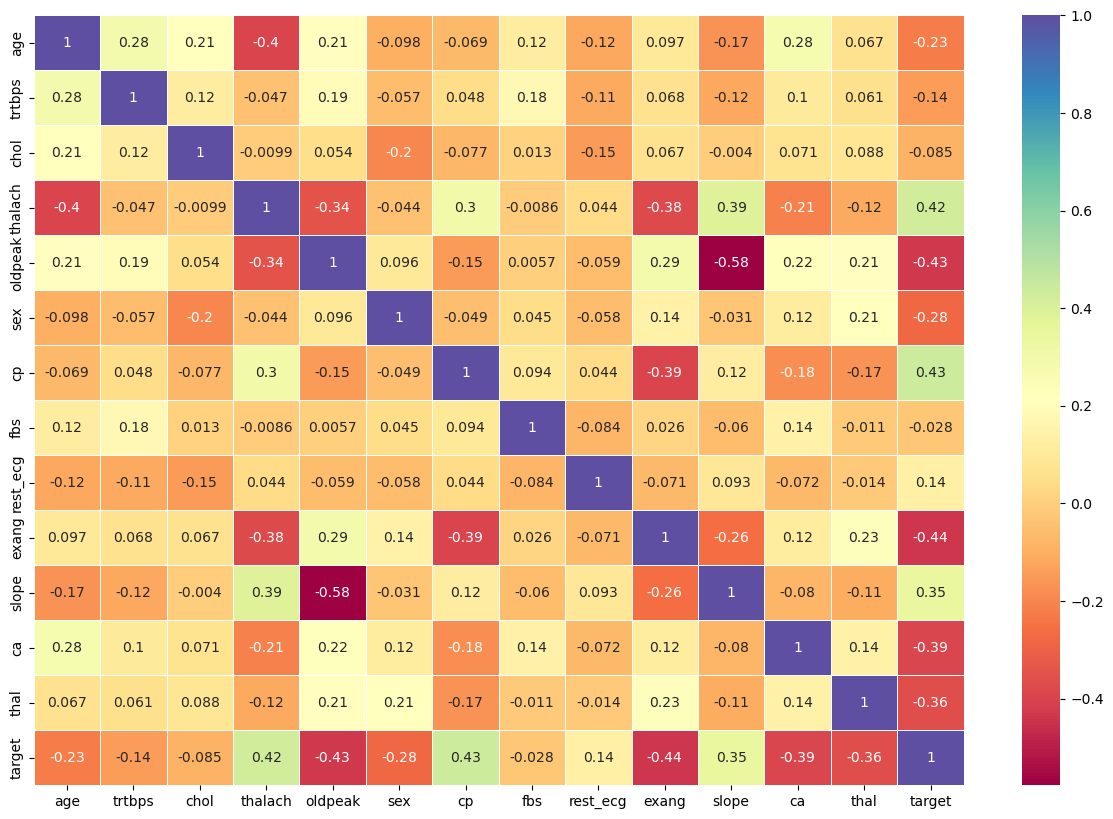

In [173]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

In [175]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

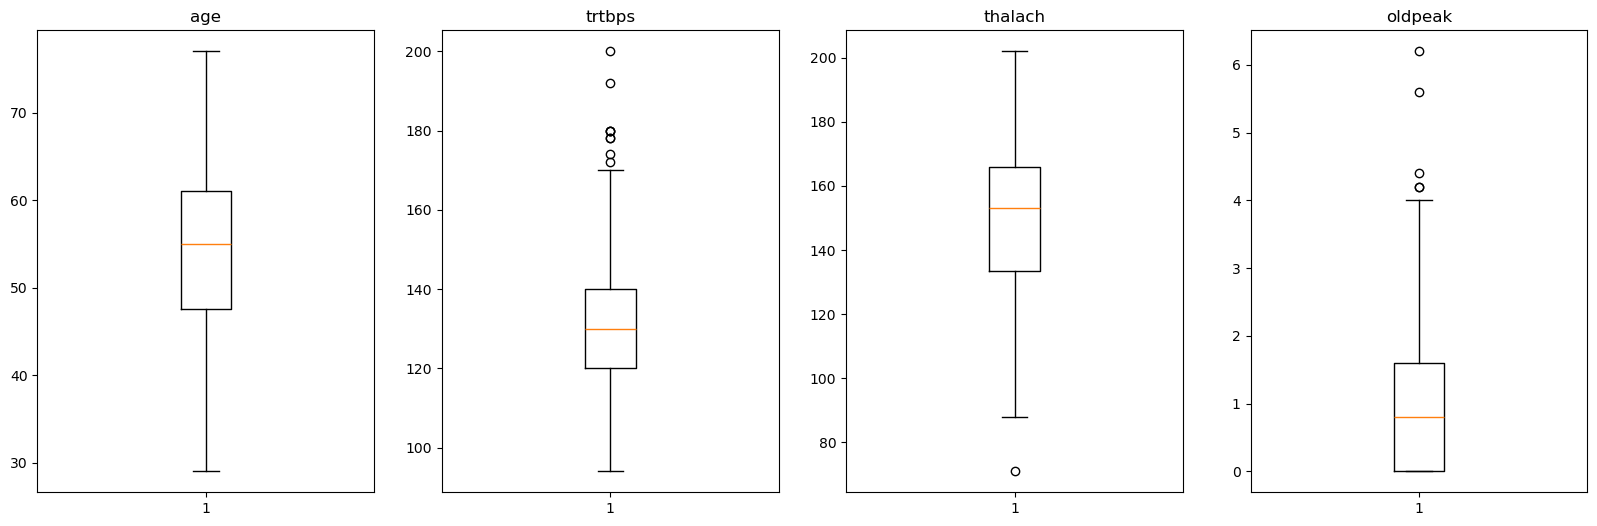

In [177]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

In [179]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [181]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")


Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [183]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps < threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 252
-------------------
Threshold Value: 2
Number of Outliers: 290
-------------------
Threshold Value: 3
Number of Outliers: 301
-------------------


In [185]:
df[z_scores_trtbps > 2][["trtbps"]]


trtbps
8       172
101     178
110     180
152     170
195     170
203     180
223     200
228     170
241     174
248     192
260     178
266     180
292     170

In [187]:
df[z_scores_trtbps > 2].trtbps.min()


170

In [189]:
df[df["trtbps"] < 170].trtbps.max()

165

In [191]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [193]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [195]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

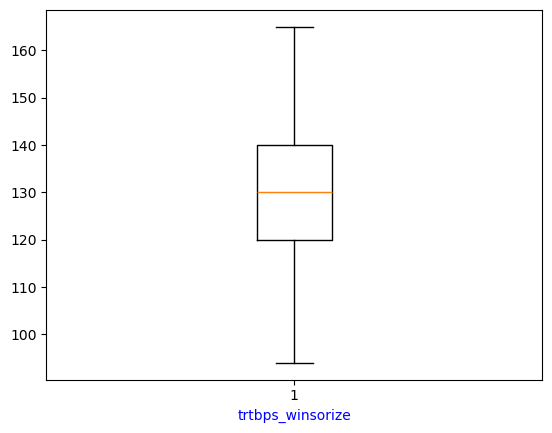

In [197]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [199]:
df["trtbps_winsorize"] = trtbps_winsorize

In [201]:

def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [203]:
thalach_out = iqr(df, "thalach")
thalach_out

age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
272   67    1   0     120       71      0      1.0      1   0     2       0   

     trtbps_winsorize  
272               120

In [205]:
df.drop([272], axis = 0, inplace = True)
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

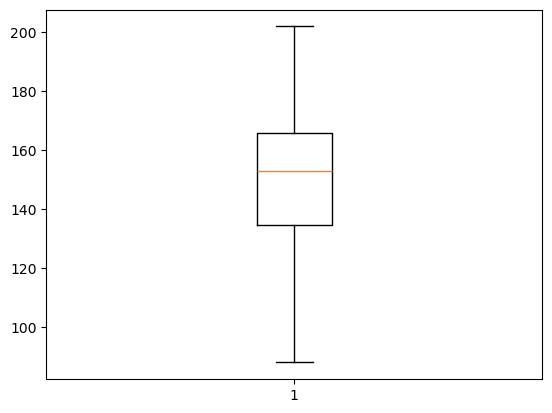

In [207]:
plt.boxplot(df["thalach"]);


In [209]:

def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]


In [211]:
iqr(df, "oldpeak")


age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
101   59    1   3     178      145      0      4.2      0   0     3       1   
204   62    0   0     160      145      0      6.2      0   3     3       0   
221   55    1   0     140      111      1      5.6      0   0     3       0   
250   51    1   0     140      122      1      4.2      1   3     3       0   
291   58    1   0     114      140      0      4.4      0   3     1       0   

     trtbps_winsorize  
101               165  
204               160  
221               140  
250               140  
291               114

In [213]:
df[df["oldpeak"] < 4.2].oldpeak.max()


4.0

In [215]:

winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [217]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

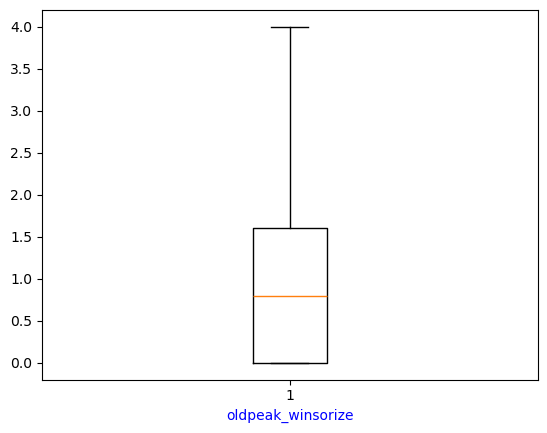

In [219]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [221]:
df["oldpeak_winsorize"] = oldpeak_winsorize


In [223]:
df.head()


age  sex  cp  trtbps  thalach  exang  oldpeak  slope  ca  thal  target  \
0   63    1   3     145      150      0      2.3      0   0     1       1   
1   37    1   2     130      187      0      3.5      0   0     2       1   
2   41    0   1     130      172      0      1.4      2   0     2       1   
3   56    1   1     120      178      0      0.8      2   0     2       1   
4   57    0   0     120      163      1      0.6      2   0     2       1   

   trtbps_winsorize  oldpeak_winsorize  
0               145                2.3  
1               130                3.5  
2               130                1.4  
3               120                0.8  
4               120                0.6

In [225]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

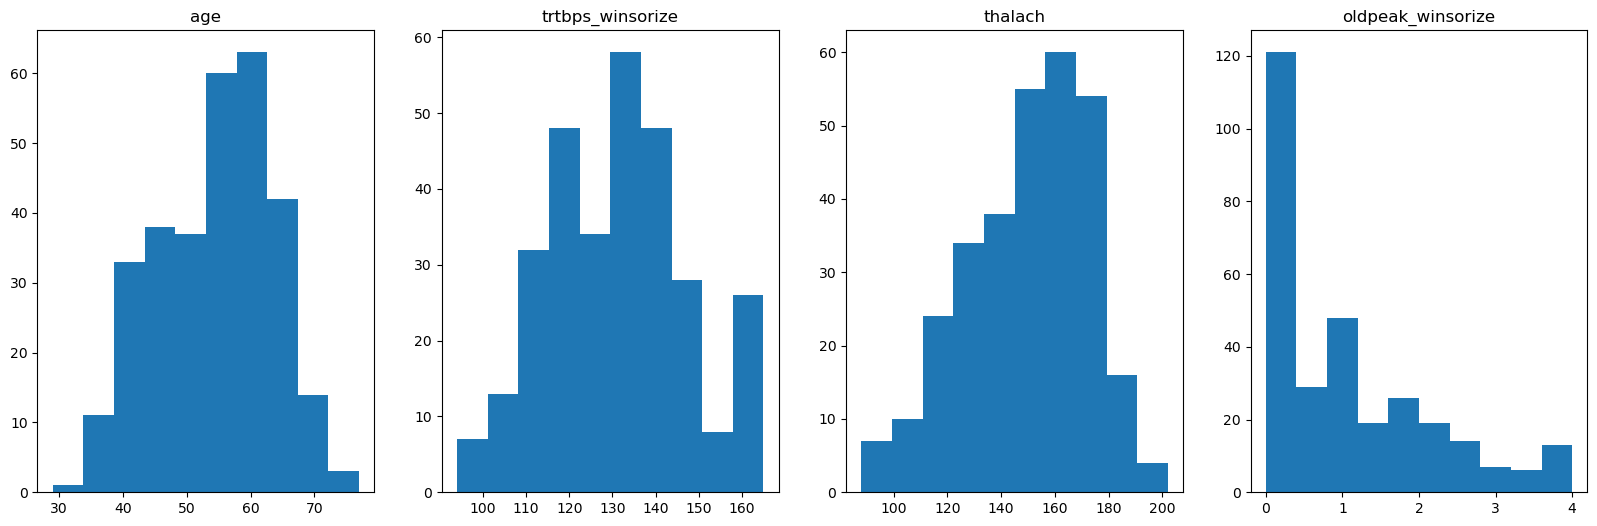

In [227]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [229]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

skew
age               -0.199209
trtbps_winsorize   0.251969
thalach           -0.461611
oldpeak_winsorize  0.996036

In [231]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [233]:
df.head()

age  sex  cp  thalach  exang  slope  ca  thal  target  trtbps_winsorize  \
0   63    1   3      150      0      0   0     1       1               145   
1   37    1   2      187      0      0   0     2       1               130   
2   41    0   1      172      0      2   0     2       1               130   
3   56    1   1      178      0      2   0     2       1               120   
4   57    0   0      163      1      2   0     2       1               120   

   oldpeak_winsorize  oldpeak_winsorize_log  oldpeak_winsorize_sqrt  
0                2.3               0.832909                1.516575  
1                3.5               1.252763                1.870829  
2                1.4               0.336472                1.183216  
3                0.8              -0.223144                0.894427  
4                0.6              -0.510826                0.774597

In [235]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

skew
oldpeak_winsorize       0.996036
oldpeak_winsorize_log        NaN
oldpeak_winsorize_sqrt  0.108926

In [237]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [239]:

df_copy = df.copy()

In [241]:

categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [243]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)


In [245]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [247]:
robus_scaler = RobustScaler()

In [255]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

age   thalach  target  trtbps_winsorize  oldpeak_winsorize_sqrt  \
0  0.581818 -0.095238       1              0.75                0.491851   
1 -1.309091  1.079365       1              0.00                0.771913   
2 -1.018182  0.603175       1              0.00                0.228308   
3  0.072727  0.793651       1             -0.50                0.000000   
4  0.145455  0.317460       1             -0.50               -0.094734   

   sex_1   cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
0   True  False  False   True    False    False    False  False  False  False   
1   True  False   True  False    False    False    False  False  False  False   
2  False   True  False  False    False    False     True  False  False  False   
3   True   True  False  False    False    False     True  False  False  False   
4  False  False  False  False     True    False     True  False  False  False   

    ca_4  thal_2  thal_3  
0  False   False   False  
1  False    True   False  
2  False    True   False  
3  False    True   False  
4  False    True   False

In [257]:
from sklearn.model_selection import train_test_split

X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [261]:
X_train.head()

age   thalach  trtbps_winsorize  oldpeak_winsorize_sqrt  sex_1  \
201  0.363636 -0.380952             -0.25                0.615769   True   
82   0.363636  0.222222             -1.40               -0.707107  False   
187 -0.072727 -1.396825             -0.30                0.465497   True   
259 -1.236364  0.920635             -0.50                0.833997   True   
5    0.145455 -0.158730              0.50               -0.207107   True   

      cp_1   cp_2   cp_3  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3  \
201  False  False  False     True     True    False   True  False  False   
82   False   True  False    False    False     True   True  False  False   
187  False  False  False     True     True    False   True  False  False   
259  False  False   True     True     True    False  False  False  False   
5    False  False  False    False     True    False  False  False  False   

      ca_4  thal_2  thal_3  
201  False   False    True  
82   False    True   False  
187  False   False    True  
259  False   False    True  
5    False   False   False

In [263]:
y_train.head()

target
201       0
82        1
187       0
259       0
5         1

In [265]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [269]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [271]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [273]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [275]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


In [277]:
from sklearn.model_selection import cross_val_score


In [279]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


In [283]:
from sklearn.metrics import RocCurveDisplay

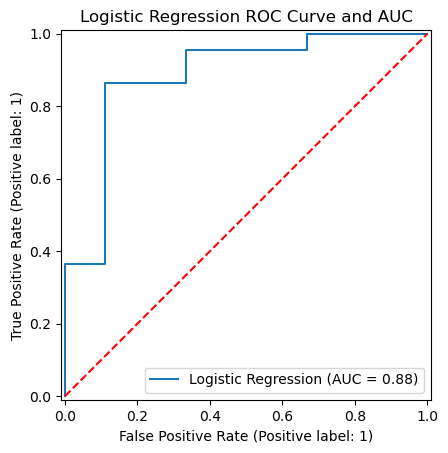

In [289]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="Logistic Regression")

plt.plot([0, 1], [0, 1], "r--")

plt.title("Logistic Regression ROC Curve and AUC")

plt.show()

In [291]:
from sklearn.model_selection import GridSearchCV

In [293]:
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [295]:
parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [297]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

In [299]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [301]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [303]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2


LogisticRegression(penalty='l1', solver='saga')

In [305]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [307]:
y_pred = log_reg_new2.predict(X_test)

In [309]:
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


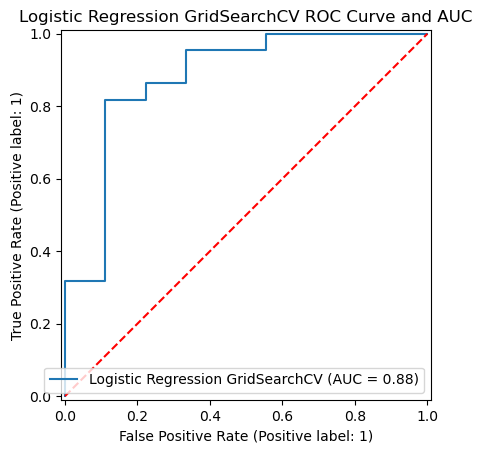

In [313]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(log_reg_new2, X_test, y_test, name="Logistic Regression GridSearchCV")

plt.plot([0, 1], [0, 1], "r--")

plt.title("Logistic Regression GridSearchCV ROC Curve and AUC")

plt.show()


In [315]:
from sklearn.tree import DecisionTreeClassifier


In [317]:
dec_tree = DecisionTreeClassifier(random_state = 5)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [319]:
y_pred = dec_tree.predict(X_test)

In [323]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.8387096774193549


In [325]:
scores = cross_val_score(dec_tree, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


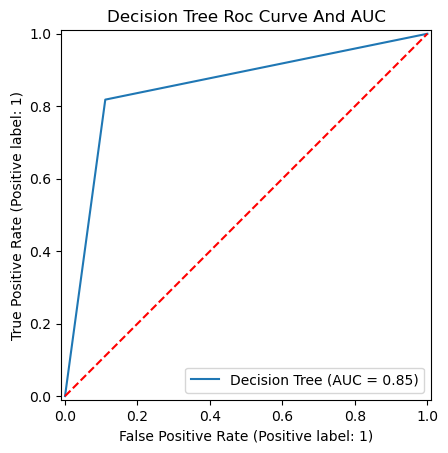

In [327]:
RocCurveDisplay.from_estimator(dec_tree, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [329]:
from sklearn.svm import SVC

svc_model = SVC(random_state = 5)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print("The test accuracy score of SVM is:", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is: 0.8709677419354839


In [331]:
scores = cross_val_score(svc_model, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


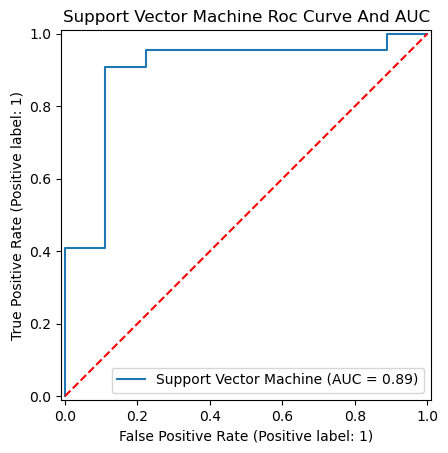

In [333]:
RocCurveDisplay.from_estimator(svc_model, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [335]:
from sklearn.ensemble import RandomForestClassifier


In [337]:
random_forest = RandomForestClassifier(random_state = 5)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("The test accuracy score of Random Forest is", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is 0.8387096774193549


In [339]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8999999999999998


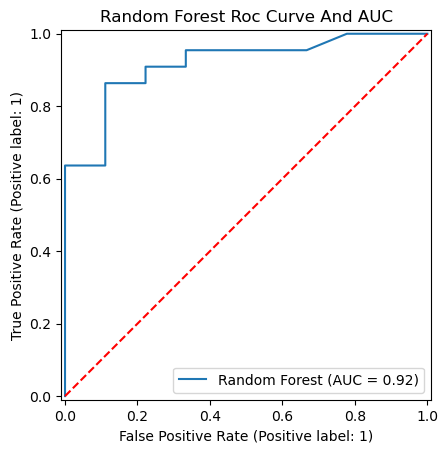

In [341]:
RocCurveDisplay.from_estimator(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [343]:
random_forest_new = RandomForestClassifier(random_state = 5)
random_forest_new

RandomForestClassifier(random_state=5)

In [347]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [349]:
random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters)
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [350]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [357]:
random_forest_new2 = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "sqrt", n_estimators = 200, random_state = 5)

In [359]:
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [361]:
y_pred = random_forest_new2.predict(X_test)

In [363]:
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.9032258064516129


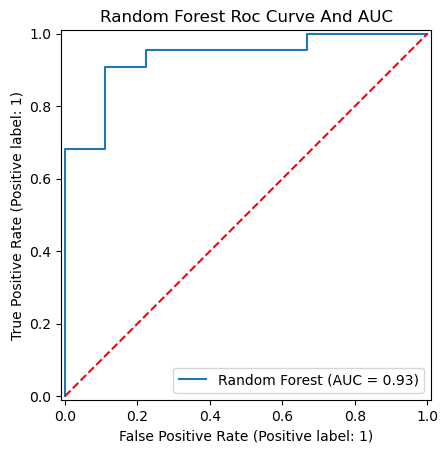

In [365]:
RocCurveDisplay.from_estimator(random_forest_new2, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()